In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import numpy as np
# import numpy.matlib
import os
import sys
import nibabel as nib
import matplotlib.pyplot as plt
# import matplotlib
# import ipywidgets as ipyw
# from matplotlib import colors
# from tqdm.auto import tqdm
# import scipy.stats
# import dipy.reconst.dki as dki
# import dipy.data
# from termcolor import colored
# from IPython.display import HTML
# import scipy.stats as stats
# from scipy.optimize import curve_fit
# import sklearn.metrics

sys.path.append('../src')
from ScanData import ScanData
from ImageSliceViewer3D import ImageSliceViewer3D
# from plotting.src.utils.slice_viewing import ImageSliceViewer3D

# TO DO:

    - Something is wrong the calculation of angle(B0, evec1). Inspect this with further visualizations. E.g. plot B0-vector and evec1 in same plot. Is it as expected?

# LABEL SPECS

In [46]:
labels_ROIs = {
    'CC' : 1, # corpus callosum
    'CING-L' : 2, #cingulum left
    'CING-R' : 3, #cingulum right
}

# PLOTTING SPECS

In [47]:
size_font = 11

plt.rc('font', family='serif')
plt.rc('font', size=size_font)        # controls default text sizes
plt.rc('axes', titlesize=size_font)   # fontsize of the axes title
plt.rc('axes', labelsize=size_font)   # fontsize of the x and y labels
plt.rc('xtick', labelsize=size_font)  # fontsize of the tick labels
plt.rc('ytick', labelsize=size_font)  # fontsize of the tick labels
plt.rc('legend', fontsize=size_font)  # legend fontsize
plt.rc('figure', titlesize=size_font) # fontsize of the figure title

dpi = 400
plt.rcParams['figure.dpi'] = dpi

In [48]:
figsize_3x1 = (7.5, 3)
figsize_1x1 = (2.5, 3)
figsize_1x1_wide = (3.75, 3)


lw = 2
s = 36#13

marker_1 = 's'
marker_2 = '^'#'x'#'o'

# SRC

In [49]:
def get_angles_between_vectors(vecs, vec):

    dot = np.sum(vecs*vec,axis=-1)

    #radians = np.arccos(dot / (np.linalg.norm(vecs, axis=-1) * np.linalg.norm(vec)))
    radians = np.arccos(np.abs(dot / (np.linalg.norm(vecs, axis=-1) * np.linalg.norm(vec))))

    return np.rad2deg(radians)

# get_angles_between_vectors(np.array([[0, 0, 1]]), np.array([0, 0, 1]))
# get_angles_between_vectors(np.array([[0, 0, -1]]), np.array([0, 0, 1]))
# get_angles_between_vectors(np.array([[0, 1, 0]]), np.array([0, 0, 1]))
# get_angles_between_vectors(np.array([[1, 0, 0]]), np.array([0, 0, 1]))
# get_angles_between_vectors(np.array([[1, 1, 0]]), np.array([0, 0, 1]))
# get_angles_between_vectors(np.array([[0, 1, 1]]), np.array([0, 0, 1]))

# PATHS

In [50]:
path_data = '../data/ex_vivo/'
path_figures = '../figures/'

### SCAN SERIES 1

In [51]:
# #### denoised
# # path_preprocessed_a = path_data + 'preprocessed_M0686-M0687-M0688-M0689-M0694-M0695-M0697-M0698/'

# #### not denoised
# path_preprocessed_a = path_data + 'preprocessed_M0694-M0695-M0697-M0698_not-denoised/'

# #### images and schemes
# name_ROIs = 'static_mask.nii.gz'

# # M0694
# path_M0694_dwi_images = path_preprocessed_a + 'M0694-N8841-4-1_DtiStandard_PGSE_deg=0_TE=36_unringed_registered-com-trans-rigid-affine.nii'
# # path_M0694_dwi_images = path_preprocessed_a + 'M0694-N8841-4-1_DtiStandard_PGSE_deg=0_TE=36_unringed_denoised_mppca_registered-com-trans-rigid-affine.nii'
# path_M0694_dwi_scheme = path_preprocessed_a + 'M0694-N8841-4-1_DtiStandard_PGSE_deg=0_TE=36_effbvector_registered.scheme'
# path_M0694_ROIs = path_preprocessed_a + name_ROIs

# # M0695
# path_M0695_dwi_images = path_preprocessed_a + 'M0695-N8841-4-1_DtiStandard_PGSE_deg=90_TE=36_unringed_registered-com-trans-rigid-affine.nii'
# # path_M0695_dwi_images = path_preprocessed_a + 'M0695-N8841-4-1_DtiStandard_PGSE_deg=90_TE=36_unringed_denoised_mppca_registered-com-trans-rigid-affine.nii'
# path_M0695_dwi_scheme = path_preprocessed_a + 'M0695-N8841-4-1_DtiStandard_PGSE_deg=90_TE=36_effbvector_registered.scheme'
# path_M0695_ROIs = path_preprocessed_a + name_ROIs

# # M0697
# path_M0697_dwi_images = path_preprocessed_a + 'M0697-N8841-4-1_DtiStandard_PGSE_deg=90_TE=36_unringed_registered-com-trans-rigid-affine.nii'
# # path_M0697_dwi_images = path_preprocessed_a + 'M0697-N8841-4-1_DtiStandard_PGSE_deg=90_TE=36_unringed_denoised_mppca_registered-com-trans-rigid-affine.nii'
# path_M0697_dwi_scheme = path_preprocessed_a + 'M0697-N8841-4-1_DtiStandard_PGSE_deg=90_TE=36_effbvector_registered.scheme'
# path_M0697_ROIs = path_preprocessed_a + name_ROIs

# # M0698
# path_M0698_dwi_images = path_preprocessed_a + 'M0698-N8841-4-1_DtiStandard_PGSE_deg=60_TE=36_unringed_registered-com-trans-rigid-affine.nii'
# # path_M0698_dwi_images = path_preprocessed_a + 'M0698-N8841-4-1_DtiStandard_PGSE_deg=60_TE=36_unringed_denoised_mppca_registered-com-trans-rigid-affine.nii'
# path_M0698_dwi_scheme = path_preprocessed_a + 'M0698-N8841-4-1_DtiStandard_PGSE_deg=60_TE=36_effbvector_registered.scheme'
# path_M0698_ROIs = path_preprocessed_a + name_ROIs

# #### INITIALIZE SCAN-OBJECTS
# #### REGULAR PGSE
# scanM0694 = ScanData(path_M0694_dwi_images, 
#                      path_M0694_dwi_scheme, 
#                      path_M0694_ROIs, 
#                      labels_ROIs, 
#                      tag='0 deg, PGSE', 
#                      marker='.')

# scanM0695 = ScanData(path_M0695_dwi_images, 
#                      path_M0695_dwi_scheme, 
#                      path_M0695_ROIs, 
#                      labels_ROIs, 
#                      tag='90 deg, PGSE', 
#                      marker='.')

# scanM0697 = ScanData(path_M0697_dwi_images, 
#                      path_M0697_dwi_scheme, 
#                      path_M0697_ROIs, 
#                      labels_ROIs, 
#                      tag='30 deg, PGSE', 
#                      marker='.')

# scanM0698 = ScanData(path_M0698_dwi_images, 
#                      path_M0698_dwi_scheme, 
#                      path_M0698_ROIs, 
#                      labels_ROIs, 
#                      tag='60 deg, PGSE', 
#                      marker='.')

# scans_a = [scanM0694, scanM0695, scanM0697, scanM0698,]
# scan_sessions = [scans_a]
# idxs_scan_series = ['1']

### SCAN SERIES 2

In [52]:
#### denoised
# path_preprocessed_b = path_data + 'preprocessed_M0714-M0715-M0716-M0717/'

#### not denoised
path_preprocessed_b = path_data + '/scan_series_2_preprocessed/'

#### images and schemes
# path_ROIs_a = path_preprocessed_a + 'static_mask_v2.nii.gz'
name_ROIs = 'static_mask.nii.gz'

# M0714
path_M0714_dwi_images = path_preprocessed_b + 'M0714-N8841-4-1_DtiStandard_PGSE_deg=0_TE=36_unringed_registered-com-trans-rigid-affine.nii'
# path_M0714_dwi_images = path_preprocessed_b + 'M0714-N8841-4-1_DtiStandard_PGSE_deg=0_TE=36_unringed_denoised_mppca_registered-com-trans-rigid-affine.nii'
path_M0714_dwi_scheme = path_preprocessed_b + 'M0714-N8841-4-1_DtiStandard_PGSE_deg=0_TE=36_effbvector_registered.scheme'
path_M0714_ROIs = path_preprocessed_b + name_ROIs

# M0715
path_M0715_dwi_images = path_preprocessed_b + 'M0715-N8841-4-1_DtiStandard_PGSE_deg=90_TE=36_unringed_registered-com-trans-rigid-affine.nii'
# path_M0715_dwi_images = path_preprocessed_b + 'M0715-N8841-4-1_DtiStandard_PGSE_deg=90_TE=36_unringed_denoised_mppca_registered-com-trans-rigid-affine.nii'
path_M0715_dwi_scheme = path_preprocessed_b + 'M0715-N8841-4-1_DtiStandard_PGSE_deg=90_TE=36_effbvector_registered.scheme'
path_M0715_ROIs = path_preprocessed_b + name_ROIs

# M0716
path_M0716_dwi_images = path_preprocessed_b + 'M0716-N8841-4-1_DtiStandard_PGSE_deg=30_TE=36_unringed_registered-com-trans-rigid-affine.nii'
# path_M0716_dwi_images = path_preprocessed_b + 'M0716-N8841-4-1_DtiStandard_PGSE_deg=30_TE=36_unringed_denoised_mppca_registered-com-trans-rigid-affine.nii'
path_M0716_dwi_scheme = path_preprocessed_b + 'M0716-N8841-4-1_DtiStandard_PGSE_deg=30_TE=36_effbvector_registered.scheme'
path_M0716_ROIs = path_preprocessed_b + name_ROIs

# M0717
path_M0717_dwi_images = path_preprocessed_b + 'M0717-N8841-4-1_DtiStandard_PGSE_deg=60_TE=36_unringed_registered-com-trans-rigid-affine.nii'
# path_M0717_dwi_images = path_preprocessed_b + 'M0717-N8841-4-1_DtiStandard_PGSE_deg=60_TE=36_unringed_denoised_mppca_registered-com-trans-rigid-affine.nii'
path_M0717_dwi_scheme = path_preprocessed_b + 'M0717-N8841-4-1_DtiStandard_PGSE_deg=60_TE=36_effbvector_registered.scheme'
path_M0717_ROIs = path_preprocessed_b + name_ROIs

#### INITIALIZE SCAN_OBJECTS
scanM0714 = ScanData(path_M0714_dwi_images, 
                     path_M0714_dwi_scheme, 
                     path_M0714_ROIs, 
                     labels_ROIs, 
                     tag='0 deg, PGSE', 
                     marker='.')

scanM0715 = ScanData(path_M0715_dwi_images, 
                     path_M0715_dwi_scheme, 
                     path_M0715_ROIs, 
                     labels_ROIs, 
                     tag='90 deg, PGSE', 
                     marker='.')

scanM0716 = ScanData(path_M0716_dwi_images, 
                     path_M0716_dwi_scheme, 
                     path_M0716_ROIs, 
                     labels_ROIs, 
                     tag='30 deg, PGSE', 
                     marker='.')

scanM0717 = ScanData(path_M0717_dwi_images, 
                     path_M0717_dwi_scheme, 
                     path_M0717_ROIs, 
                     labels_ROIs, 
                     tag='60 deg, PGSE', 
                     marker='.')

scans_b = [scanM0714, scanM0715, scanM0716, scanM0717,]
scan_sessions = [scans_b]
idxs_scan_series = ['2']

thres_b = 100

for scan in scans:
    
    mask = (scan.bvals_eff > thres_b)[:, 0]
    
    scan.V = scan.V[:, :, :, mask]
    scan.bvals = scan.bvals[mask]
    scan.bvals_eff = scan.bvals_eff[mask]
    scan.bvecs = scan.bvecs[mask, :]
    
    print(np.sum(mask))
    
    print(scan.tag)
    print(scan.V.shape)
    print(scan.bvals.shape)
    print(scan.bvals_eff.shape)
    print(scan.bvecs.shape)

# INSPECT IMAGES REGION

In [ ]:
%matplotlib notebook
plt.close('all')

idx_oi = 0

for scans in scan_sessions[:1]:
    
    for scan in scans:

        print('scan.tag: ', scan.tag)
        print('scan.V.shape: ', scan.V.shape)
        print('scan.bvals[idx_oi]: ', scan.bvals[idx_oi])

        ImageSliceViewer3D([scan.V[..., idx_oi]])
        print(scan.V[..., idx_oi][0,0,0])

0 deg, PGSE
(60, 60, 35, 294)
[50]


# POLARITY CORRECTION

In [12]:
for scans in scan_sessions:

    for scan in scans:

        scan.bvecs_unique_negative = scan.bvecs_unique[scan.bvecs_unique[:, -1] < 0]
        scan.bvecs_unique_positive = scan.bvecs_unique[scan.bvecs_unique[:, -1] > 0]
        assert(scan.bvecs_unique_negative.shape == scan.bvecs_unique_positive.shape)

        mask_negative = scan.bvecs[:, -1] < 0
        mask_positive = scan.bvecs[:, -1] > 0
        # bvecs
        scan.bvecs_negative = scan.bvecs[mask_negative, :]
        scan.bvecs_positive = scan.bvecs[mask_positive, :]    
        assert(scan.bvecs_negative.shape == scan.bvecs_positive.shape)
        #bvals
        scan.bvals_negative = scan.bvals[mask_negative]
        scan.bvals_positive = scan.bvals[mask_positive]
        assert(scan.bvals_negative.shape == scan.bvals_positive.shape)
        #bvals_eff
        scan.bvals_eff_negative = scan.bvals_eff[mask_negative]
        scan.bvals_eff_positive = scan.bvals_eff[mask_positive]
        assert(scan.bvals_eff_negative.shape == scan.bvals_eff_positive.shape)

        # cross
        scan.bvals_cross = (scan.bvals_negative + scan.bvals_positive) / 2
        scan.bvals_eff_cross = (scan.bvals_eff_negative + scan.bvals_eff_positive) / 2
        #scan.bvecs = np.copy(scan.bvecs_positive)

        # volumes
        scan.V_negative = scan.V[..., mask_negative]
        scan.V_positive = scan.V[..., mask_positive]
        scan.V_cross = np.sqrt(scan.V_negative * scan.V_positive)

        print(scan.bvecs_unique.shape)

/tmp/ipykernel_8529/3434266059.py:32: RuntimeWarning: invalid value encountered in sqrt
  scan.V_cross = np.sqrt(scan.V_negative * scan.V_positive)


(42, 3)
(42, 3)
(42, 3)
(42, 3)


In [13]:
figsize_1x1_wide

(3.75, 3)

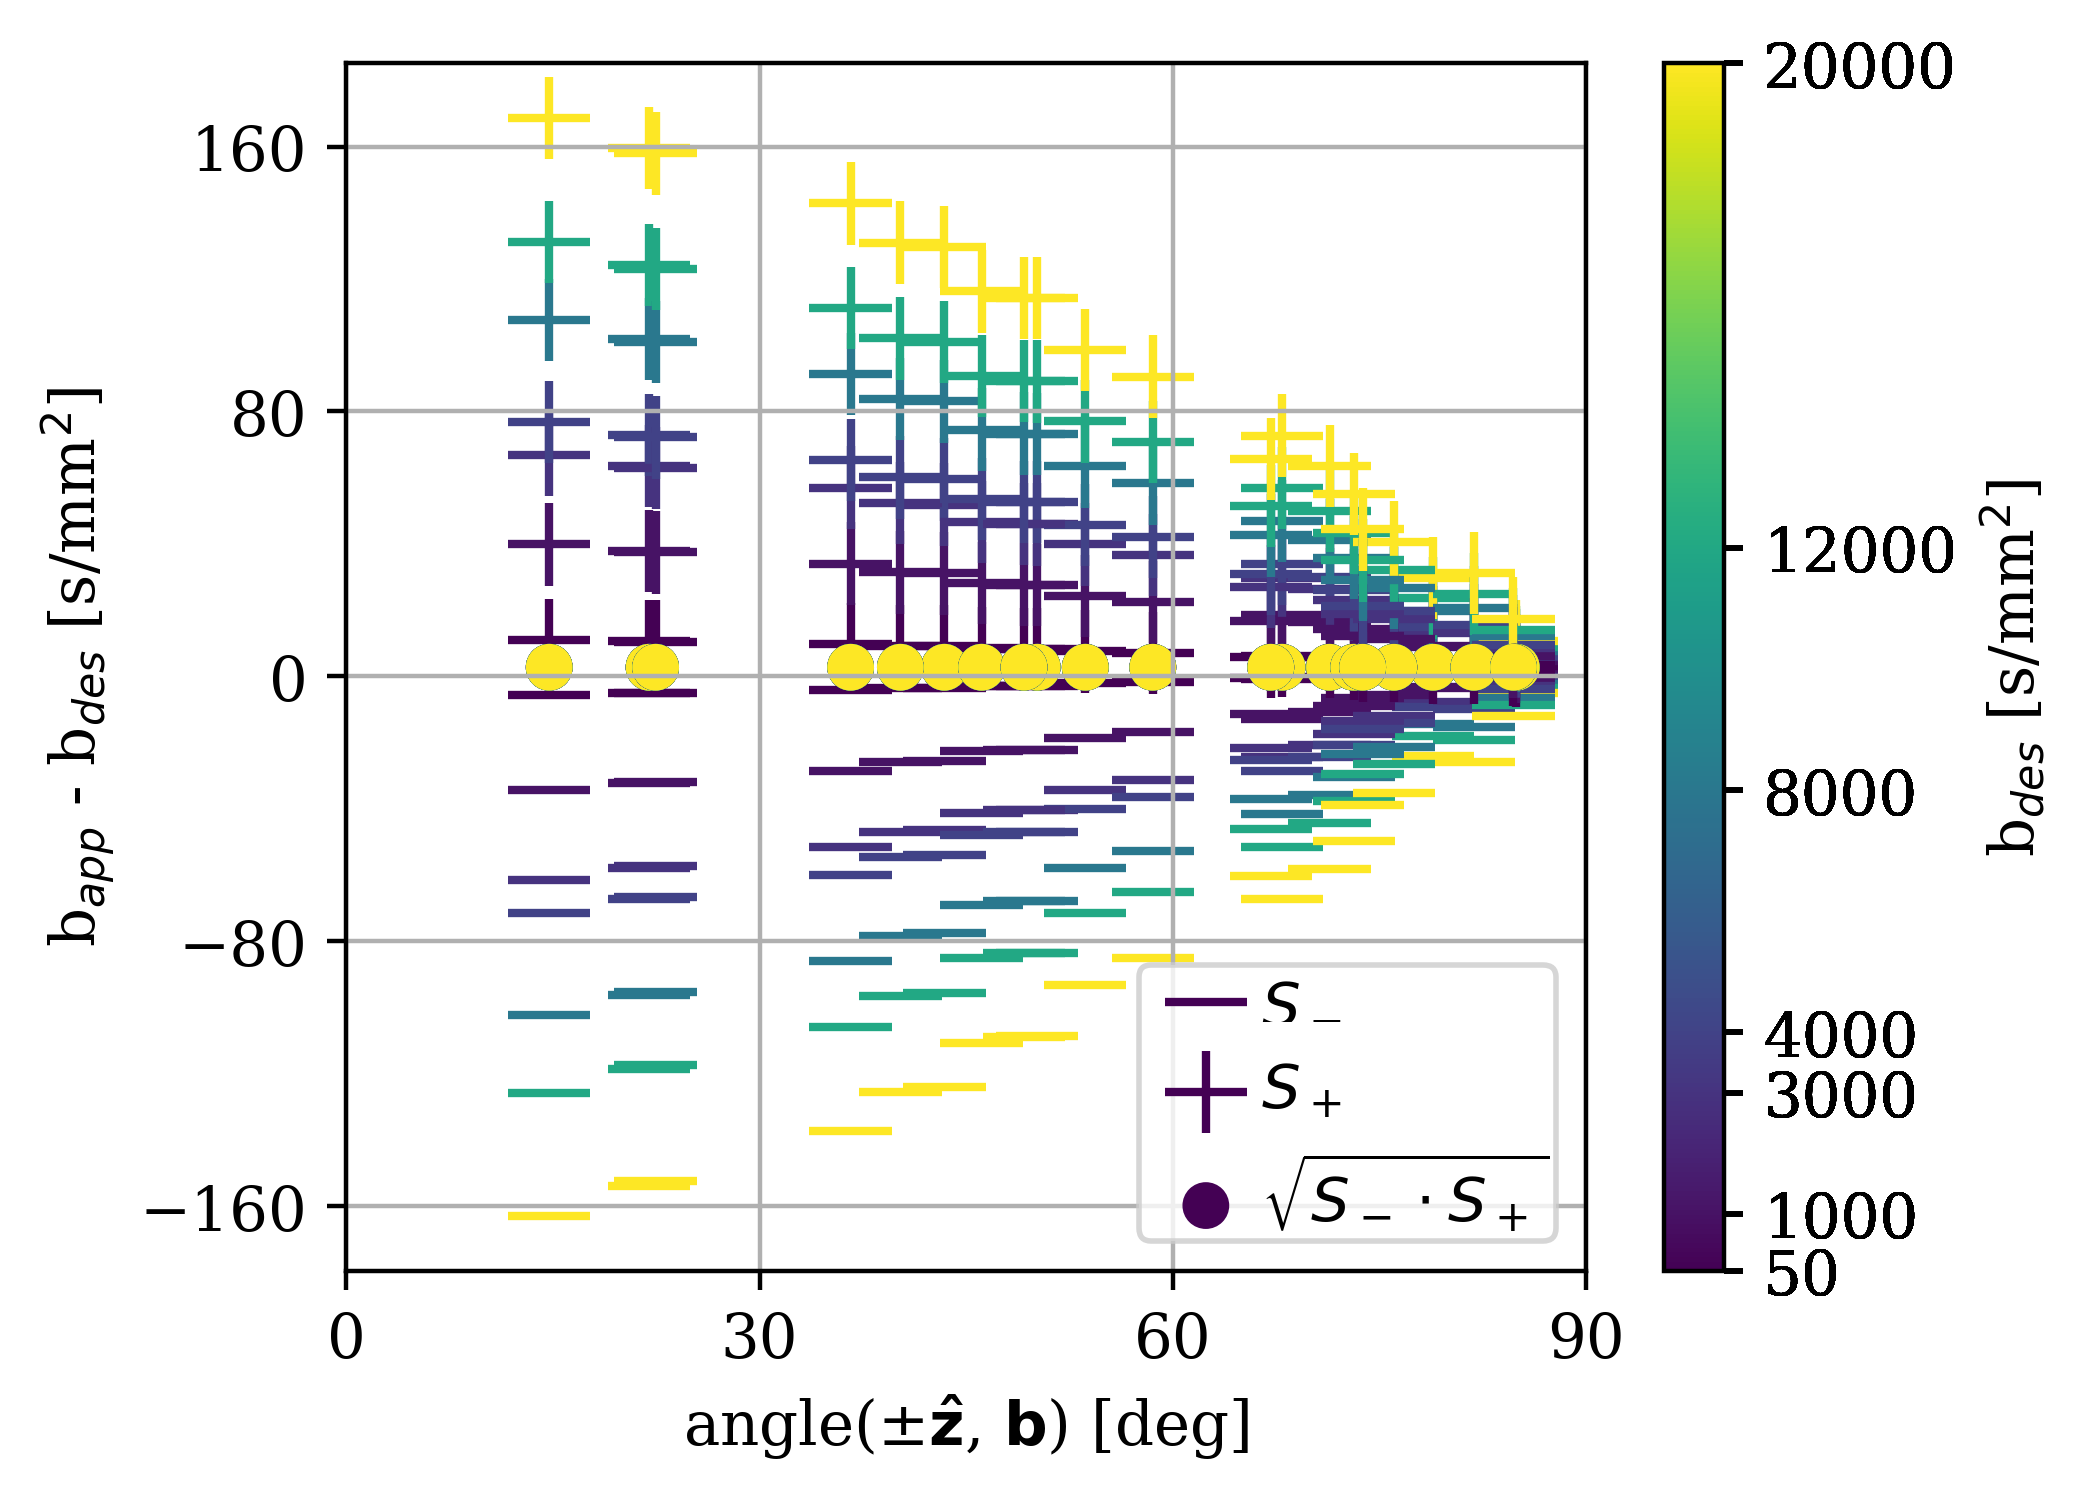

In [14]:
%matplotlib inline
plt.rcParams['figure.dpi'] = dpi

for scans in scan_sessions:

    for scan in scans[:1]:

        cmap = plt.cm.get_cmap('viridis')

        #fig, axs = plt.subplots(1, 1, figsize=figsize_1x1_wide)
        fig, axs = plt.subplots(1, 1, figsize=(5, 4))
        #fig, axs = plt.subplots(1, 1, figsize=(12, 6))
        #fig, axs = plt.subplots(1, 1, figsize=(5, 8))

        for bvecs, bvals, bvals_eff, marker in zip([scan.bvecs_negative, scan.bvecs_positive, scan.bvecs_negative], 
                                [scan.bvals_negative, scan.bvals_positive, scan.bvals_cross],
                                [scan.bvals_eff_negative, scan.bvals_eff_positive, scan.bvals_eff_cross],
                                ['_', '+', '.'],
                               ):

            angles_bs_z = get_angles_between_vectors(vecs=bvecs, vec=[0, 0, 1])
            angles_bs_z[angles_bs_z>90] = 180 - angles_bs_z[angles_bs_z>90]

            p = axs.scatter(angles_bs_z, (bvals_eff-bvals), c=bvals, 
                            marker=marker, s=220)
        axs.grid(True)

        cbar = fig.colorbar(p, ax=axs)
        cbar.set_label('b$_{des}$ [s/mm$^2$]')
        cbar.set_ticks(scan.bvals)

        axs.set_ylabel('b$_{app}$ - b$_{des}$ [s/mm$^2$]')
        #axs.set_xlabel('angle($|\mathbf{\hat{z}}|$, $\mathbf{b}$) [deg]')
        axs.set_xlabel('angle($\pm\mathbf{\hat{z}}$, $\mathbf{b}$) [deg]')
        axs.set_xlim(0, 90)
        axs.set_xticks(np.linspace(0, 90, 4))
        #axs.set_yticks(np.linspace(-80, 80, 5))
        axs.set_yticks(np.linspace(-160, 160, 5))
        #axs.set_ylim(-80, 80)
        axs.legend(['$S_-$', '$S_+$', '$\sqrt{S_- \cdot S_+}$'], loc='lower right', 
                   #fontsize=size_font,
                   handletextpad=-0.1, borderpad=0.1, #borderaxespad=-0.0
                  )

        plt.show()

# COLORING

In [15]:
cmap = plt.cm.get_cmap('viridis')

# rgba = cmap(0.5, norm=4)

for scans in scan_sessions:

    for i, scan in enumerate(scans):

        weight = float(scan.tag.replace(' deg', '').split(',')[0]) / 90

        print(scan.tag)
        print(weight)

        scan.color = cmap(weight)

0 deg, PGSE
0.0
90 deg, PGSE
1.0
30 deg, PGSE
0.3333333333333333
60 deg, PGSE
0.6666666666666666


# DTI AND DKI MODELING

voxels oi:  496


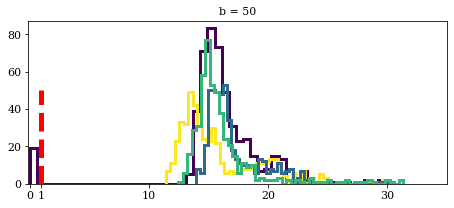

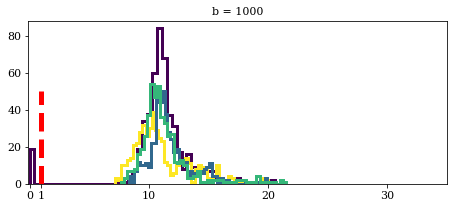

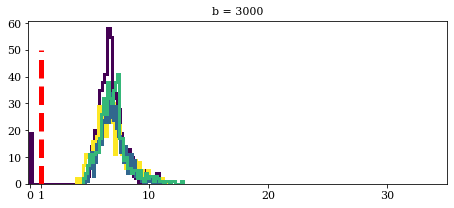

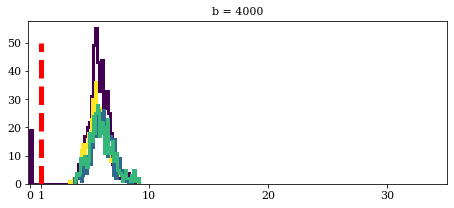

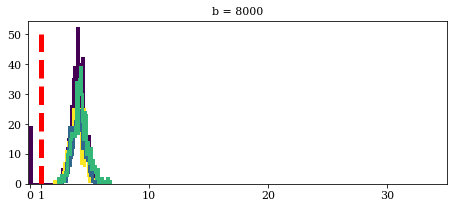

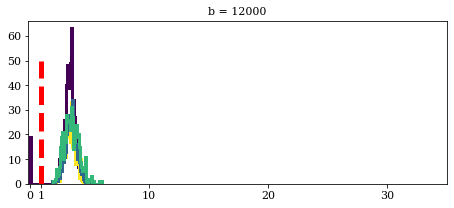

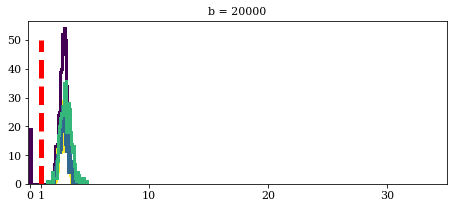

In [16]:
%matplotlib inline

# mask_FA = scans[-1].FA > 0.65

#### CC
# mask = mask_FA * (scans[0].mask_ROIs == labels_ROIs['CC']) # counter intutive! should be turned around
# mask = (scans[0].mask_ROIs == labels_ROIs['CC']) # counter intutive! should be turned around
    
#### CING-L
# mask = mask_FA * (scans[0].mask_ROIs == labels_ROIs['CING-L']) # counter intutive! should be turned around
# mask = (scans[0].mask_ROIs == labels_ROIs['CING-L']) # counter intutive! should be turned around

#### CING-R
# mask = mask_FA * (scans[0].mask_ROIs == labels_ROIs['CING-R']) # counter intutive! should be turned around
mask = (scans[0].mask_ROIs == labels_ROIs['CING-R']) # counter intutive! should be turned around

# mask = mask_FA
    
print('voxels oi: ', np.prod(mask.shape) - np.sum(np.logical_not(mask)))

_signal_threshold = 1.0

for bval in scans[0].bvals_unique:
    
    idx_bval = np.argwhere(scan.bvals == bval)[0, 0]
    
    plt.figure(figsize=figsize_3x1)

    for scan in scans:

        #### normalizing
    #     normalizer = np.repeat(scan.V_cross[:, :, :, scan.bvals_eff_cross[:, 0] < 100], len(scan.bvals_unique), axis=-1)
    #     V_cross = scan.V_cross / normalizer
    #     V_cross[np.isnan(V_cross)] = 1.

        #### no normalizing
        V_cross = scan.V_cross

        plt.hist(V_cross[mask, idx_bval], bins=50, color=scan.color, histtype='step', lw=3)

    plt.title(f'b = {bval}')
    
    plt.plot([_signal_threshold, _signal_threshold], [0, 50], color='red', lw=5, ls='--')
    plt.xlim(-0.1, 35)
    plt.xticks([0, _signal_threshold, 10, 20, 30, ])


### FIT

In [17]:
scan.bvals_unique

array([   50,  1000,  3000,  4000,  8000, 12000, 20000])

In [18]:
for scans in scan_sessions:

    for scan in tqdm(scans):

        print(scan.V_cross.shape)

        print(np.sum(np.isnan(scan.V_cross)))

        #### no normalizing
#         V_cross = np.nan_to_num(scan.V_cross)
#         min_signal = 1.0

        #### normalizing
        #normalizer = np.tile(scan.V_cross[:, :, :, scan.bvals_eff_cross[:, 0] < 100], len(scan.bvals_unique)) #wrong
        #normalizer = np.repeat(scan.V_cross[:, :, :, scan.bvals_eff_cross[:, 0] < 100], len(scan.bvals_unique), axis=-1)
        #V_cross = scan.V_cross / normalizer
        #min_signal = 0.01
        V_cross = scan.V_cross
        min_signal = 1
        
        V_cross[np.isnan(V_cross)] = 1.

        print(np.sum(np.isnan(V_cross)))
        
        #bs_oi = [50, 4000]
        #bs_oi = [4000, 8000]
        #bs_oi = [8000, 12000]
        #bs_oi = [12000, 20000]
        
#         bs_oi = [50, 1000, 3000, 4000]
        bs_oi = [4000, 8000, 12000]
#         bs_oi = [8000, 12000, 20000]

        mask_b = np.zeros(scan.bvals_eff_cross.shape).astype(bool)

        for b_oi in bs_oi:
            mask_b = mask_b + (scan.bvals_eff_cross > b_oi-500) * (scan.bvals_eff_cross < b_oi+500)
            
        mask_b = mask_b[:, 0]

        scan.fit_DTI(scan.bvals_eff_cross[mask_b, 0], scan.bvecs_positive[mask_b], 
                     volume=V_cross[:, :, :, mask_b],
                     big_delta=0.0202, small_delta=0.0072, 
                     b0_threshold=np.max(bs_oi)+500,
                     #b0_threshold=100,
                     b_thres=np.max(bs_oi)+500,
                     min_signal=min_signal
                    )

#         if 12000 in scan.bvals_unique:
            
#             print('!! fitting kurtosis !!')
            
#             scan.fit_DKI(scan.bvals_eff_cross[:, 0], scan.bvecs_positive, 
#                          volume=V_cross,
#                          big_delta=0.0202, small_delta=0.0072, 
#                          b0_threshold=100,
#                          b_thres_lower=5500,                     
#                          b_thres_upper=12500,
#                          min_signal=min_signal,
#                          include_b0=True,
#                         )


  0%|          | 0/4 [00:00<?, ?it/s]

(60, 60, 35, 147)
3151
0


/home/siwin/.conda/envs/general/lib/python3.8/site-packages/dipy/core/gradients.py:296: UserWarning: b0_threshold has a value > 199
  warn("b0_threshold has a value > 199")


(60, 60, 35, 147)
1318
0
(60, 60, 35, 147)
2230
0
(60, 60, 35, 147)
2934
0


# INSPECT DTI MAPS

In [19]:
%matplotlib notebook
plt.close('all')

for scans in scan_sessions:

    for scan in scans:
        
        print(scan.tag)

        RGB = np.copy(scan.RGB)
        alpha = np.ones((scan.V_cross[..., 1].shape))
        RGB = np.append(RGB, alpha[..., None], axis=-1)

        print(scan.eval1.shape)

        #ImageSliceViewer3D([scan.eval1[:, :, :], RGB], [1.0, 0.7])
        ImageSliceViewer3D([scan.cfa[:, :, 0, :, :]], [1.0])
        #ImageSliceViewer3D([scan.FA[:, :, :], RGB], [1.0, 0.7])
        #ImageSliceViewer3D([scan.V_cross[:, :, :, 0], scan.mask_ROIs[...]], [1.0, 0.7])
        
        break
        
    break
    
%matplotlib inline

0 deg, PGSE
(60, 60, 35)


interactive(children=(RadioButtons(description='Slice plane:', options=('x-y', 'y-z', 'z-x'), style=Descriptio…

### MASKING

In [20]:
thres_FA = 0.6#0.6#0.70 #0.65
thres_angles = 30#20#15

In [21]:
%matplotlib notebook
dpi = 100
plt.rcParams['figure.dpi'] = dpi
plt.close('all')

for scans in scan_sessions:

    for scan in scans:

        mask_FA = scan.FA > thres_FA
        #scan.mask_FA = mask_FA

        #### CC
        dir_fiber = [1., 0., 0.]
        _evecs_oi = scan.evecs[:, :, 0, :, :, 0][(scans[0].mask_ROIs == labels_ROIs['CC'])]
        print('CC: ', dir_fiber)
        angles = get_angles_between_vectors(scan.evecs[:, :, 0, :, :, 0], vec=dir_fiber)
        mask_angles = angles < thres_angles
        # mask y
        x_grid, y_grid = np.meshgrid(np.arange(scan.MD.shape[0]), np.arange(scan.MD.shape[1]))
        mask_y_idx = (y_grid < 15)#(y_grid < np.inf) #(y_grid < 15)#(y_grid > 25) #* (y_grid < 60)
        mask_y_idx = np.repeat(mask_y_idx[..., np.newaxis], scan.MD.shape[2], axis=2)
        # mask z
        z_grid, x_grid = np.meshgrid(np.arange(scan.MD.shape[2]), np.arange(scan.MD.shape[1]))
        mask_z_idx = (z_grid < 21)#(z_grid < 21)#(z_grid > 20) #(z_grid < 21)
        mask_z_idx = np.repeat(mask_z_idx[np.newaxis, :, :], scan.MD.shape[0], axis=0)
        
        #mask_CC = mask_y_idx * mask_angles * mask_FA * (scans[0].mask_ROIs == labels_ROIs['CC'])
        mask_CC = mask_y_idx * mask_z_idx * mask_angles * mask_FA * (scans[0].mask_ROIs == labels_ROIs['CC'])
        print('mask_CC: ', np.prod(mask_CC.shape) - np.sum(np.logical_not(mask_CC)))
        scan.mask_CC = mask_CC
        
        #### CING-L
        dir_fiber = [0., 1., 0.]
        print('CING-L: ', dir_fiber)
        angles = get_angles_between_vectors(scan.evecs[:, :, 0, :, :, 0], vec=dir_fiber)
        mask_angles = angles < thres_angles
        mask_CINGL = mask_angles * mask_FA * (scans[0].mask_ROIs == labels_ROIs['CING-L'])
        print('mask_CINGL: ', np.prod(mask_CINGL.shape) - np.sum(np.logical_not(mask_CINGL)))
        scan.mask_CINGL = mask_CINGL

        #### CING-R
        dir_fiber = [0., 1., 0.]
        print('CING-R: ', dir_fiber)
        angles = get_angles_between_vectors(scan.evecs[:, :, 0, :, :, 0], vec=dir_fiber)
        mask_angles = angles < thres_angles
        mask_CINGR = mask_angles * mask_FA * (scans[0].mask_ROIs == labels_ROIs['CING-R'])
        print('mask_CINGR: ', np.prod(mask_CINGR.shape) - np.sum(np.logical_not(mask_CINGR)))
        scan.mask_CINGR = mask_CINGR
        
        
        
        #mask_oi = mask_CINGL
        # mask_oi = mask_CINGR
        mask_oi = mask_CC

#         print('voxels oi: ', np.prod(mask_oi.shape) - np.sum(np.logical_not(mask_oi)))
        print(scan.tag+'\n')

        RGB = np.copy(scan.RGB)
        alpha = np.ones((scan.V_cross[..., 1].shape))
        alpha[np.logical_not(mask_oi)] = 0.0
        RGB = np.append(RGB, alpha[..., None], axis=-1)

#         ImageSliceViewer3D([scan.V_cross[:, :, :, 0], RGB], [1.0, 0.7])
#         ImageSliceViewer3D([scan.V_cross[:, :, :, 0], scan.mask_ROIs[...]], [1.0, 0.7])
#         ImageSliceViewer3D([scan.MD[:, :, :], scan.mask_ROIs[...]], [1.0, 0.7])
#         input('...')

CC:  [1.0, 0.0, 0.0]
mask_CC:  300
CING-L:  [0.0, 1.0, 0.0]
mask_CINGL:  351
CING-R:  [0.0, 1.0, 0.0]
mask_CINGR:  322
0 deg, PGSE

CC:  [1.0, 0.0, 0.0]
mask_CC:  325
CING-L:  [0.0, 1.0, 0.0]
mask_CINGL:  293
CING-R:  [0.0, 1.0, 0.0]
mask_CINGR:  223
90 deg, PGSE

CC:  [1.0, 0.0, 0.0]
mask_CC:  325
CING-L:  [0.0, 1.0, 0.0]
mask_CINGL:  383
CING-R:  [0.0, 1.0, 0.0]
mask_CINGR:  323
30 deg, PGSE

CC:  [1.0, 0.0, 0.0]
mask_CC:  325
CING-L:  [0.0, 1.0, 0.0]
mask_CINGL:  315
CING-R:  [0.0, 1.0, 0.0]
mask_CINGR:  307
60 deg, PGSE



# PA vs. $1/\sqrt{b}$

In [22]:
scan.bvals_unique

array([   50,  1000,  3000,  4000,  8000, 12000, 20000])

0.9997
0.9991
0.9992
1.0000
0.9991
1.0000
0.9989
1.0000
1.0000
0.9998
0.9999
0.9999


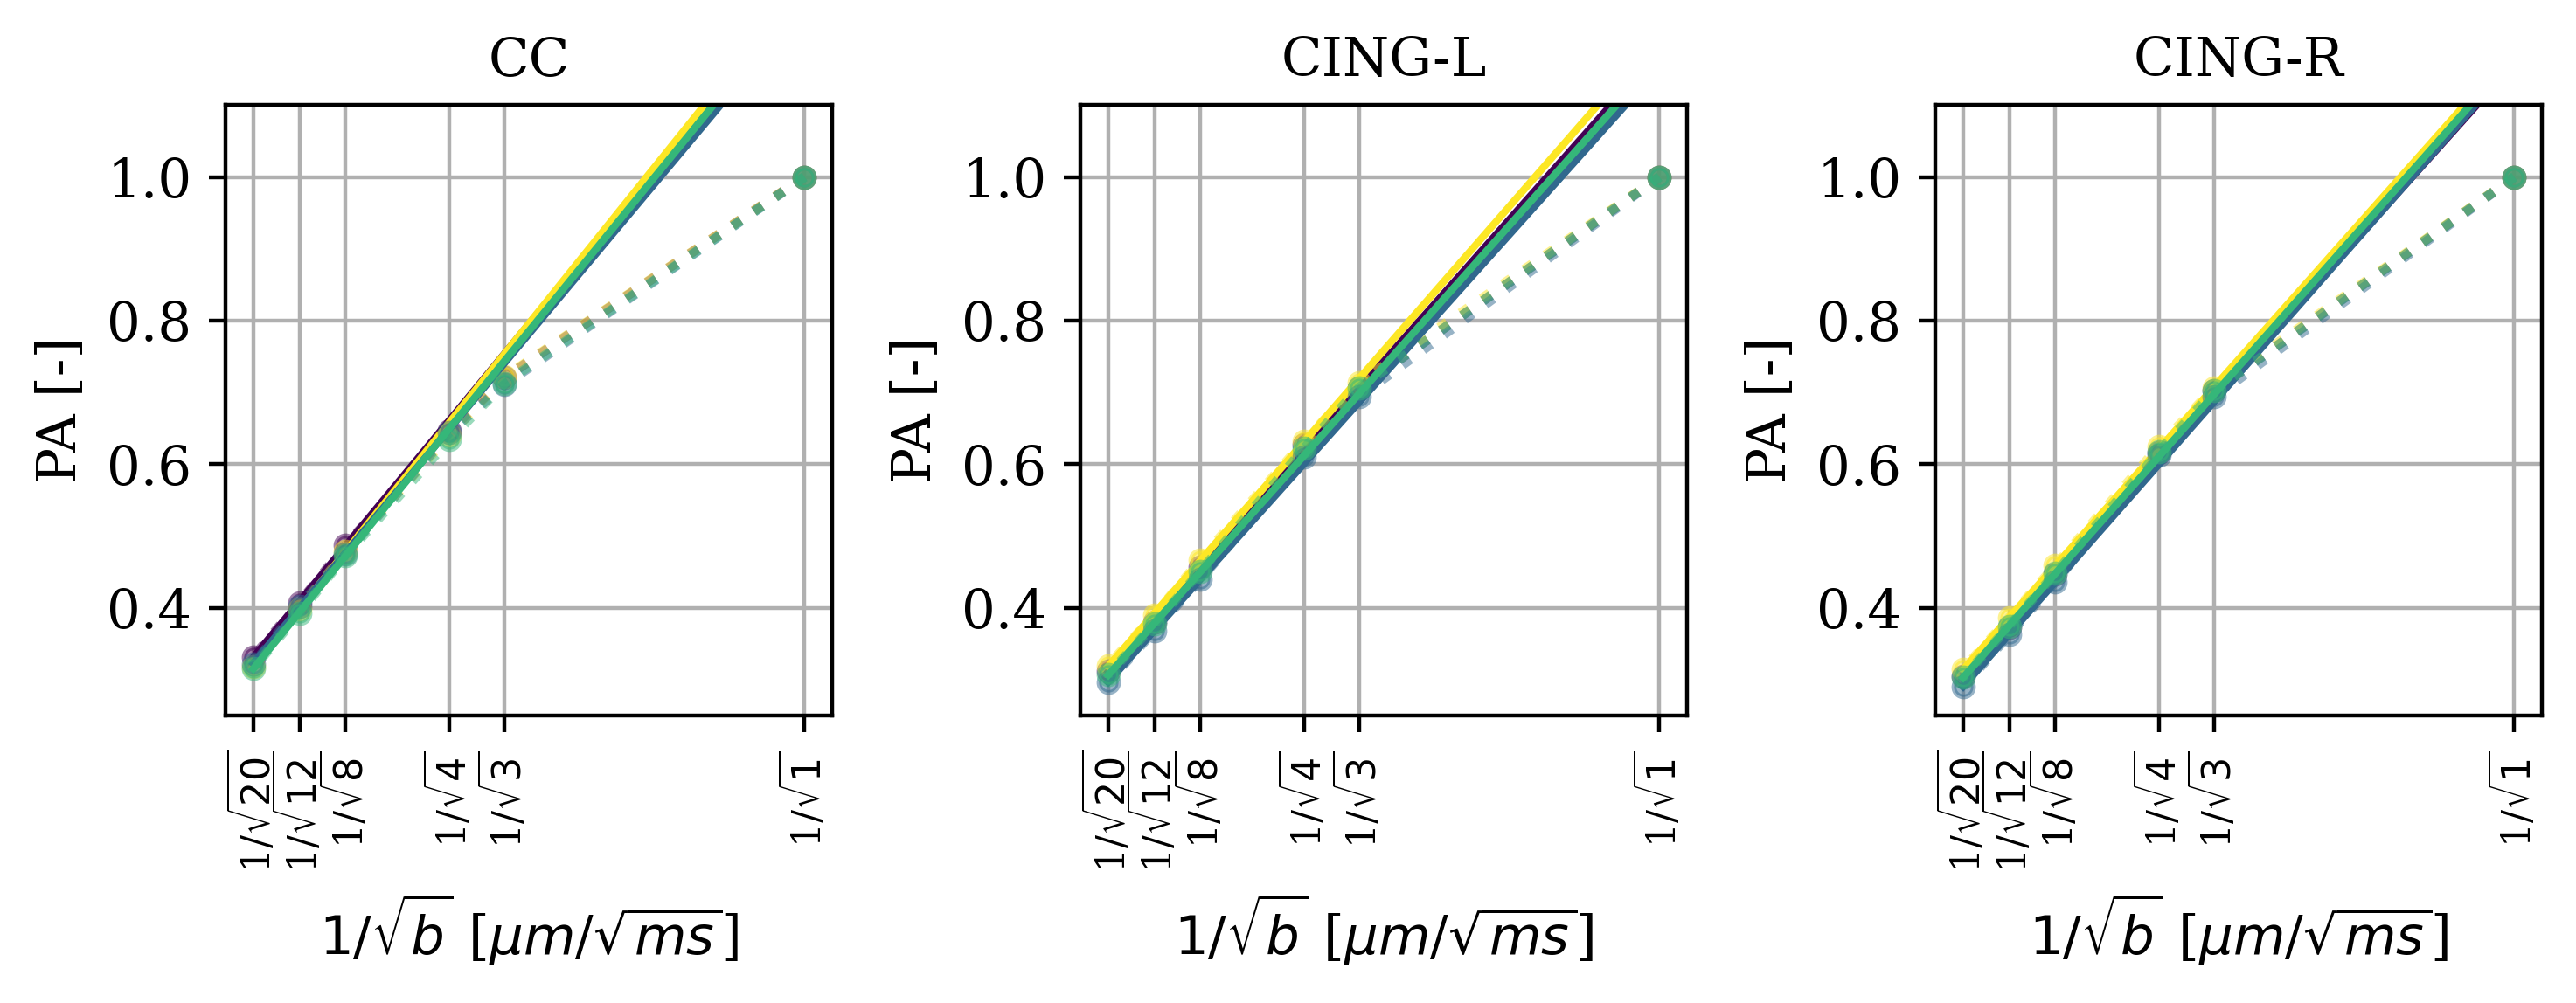

In [23]:
%matplotlib inline

plt.close('all')

size_font = 11

plt.rc('font', family='serif')
plt.rc('font', size=size_font)        # controls default text sizes
plt.rc('axes', titlesize=size_font)   # fontsize of the axes title
plt.rc('axes', labelsize=size_font)   # fontsize of the x and y labels
plt.rc('xtick', labelsize=size_font)  # fontsize of the tick labels
plt.rc('ytick', labelsize=size_font)  # fontsize of the tick labels
plt.rc('legend', fontsize=size_font)  # legend fontsize
plt.rc('figure', titlesize=size_font) # fontsize of the figure title

plt.rcParams['figure.dpi'] = 400

####

fig, axs = plt.subplots(1, 3, figsize=figsize_3x1)

# bvals_oi = scan.bvals_unique
bvals_oi = [1000, 3000, 4000, 8000, 12000, 20000]
# bvals_oi = [3000, 4000, 8000, 12000, 20000]
# bvals_oi = [4000, 8000, 12000, 20000]
# bvals_oi = [8000, 12000, 20000]

for scan in scans_b:
    
    for label, idx_label in labels_ROIs.items():
        
        axs[idx_label-1].set_title(label)
        
        if label == 'CING-L':
            mask_oi = scan.mask_CINGL
        elif label == 'CING-R':
            mask_oi = scan.mask_CINGR
        elif label == 'CC':
            mask_oi = scan.mask_CC
             
        PAs = []
        
        for bval in bvals_oi:
    
            PAs.append(np.mean(scan.V_cross[:, :, :, (scan.bvals_cross == bval)[:, 0]], axis=-1)[mask_oi])
        
        PAs = np.array(PAs)
        # normalize
        #PAs = PAs / PAs[-1, :] # to highest b
        PAs = PAs / PAs[0, :] # to lowest b
        #PAs = PAs - PAs[-1, :] # to highest b
        
        #for PA_per_voxel in PAs.T:
        #    axs[idx_label].plot(1/np.sqrt(scan.bvals_unique), PA_per_voxel, marker='o', alpha=0.5)
            
        xs = 1/np.sqrt(bvals_oi)
        ys = np.mean(PAs, axis=-1)
        ys_std = np.std(PAs, axis=-1)
        
        axs[idx_label-1].plot(xs, ys, 
                              marker='o', ms=4, alpha=0.5, color=scan.color,
                              linestyle=':', lw=2)
        
#         #### extrapolate straight line
#         z = np.polyfit(xs[-2:], ys[-2:], 1)
#         f = np.poly1d(z)
        
#         axs[idx_label-1].plot(xs[[0, -1]], [f(xs[0]), f(xs[-1])], 
#                               color=scan.color)

        #### linear fit
        bvals_fit = np.array([8000, 12000, 20000])
        #bvals_fit = np.array([3000, 4000, 8000])
        #bvals_fit = np.array([1000, 3000, 4000])
        PAs_fit = ys[np.array([b in bvals_fit for b in bvals_oi])]
        PAs_std_fit = ys_std[np.array([b in bvals_fit for b in bvals_oi])]
        def func_line(x, a, b):
            return a + x*b
        popt, pcov = curve_fit(func_line, 1/np.sqrt(bvals_fit), PAs_fit)
        a, b = popt
        a_std, b_std = np.sqrt(np.diag(pcov))
        axs[idx_label-1].plot(xs, func_line(xs, a, b), 
                              color=scan.color)
        
        SS_res = np.sum((PAs_fit - func_line(1/np.sqrt(bvals_fit), a, b))**2)
        SS_tot = np.sum((PAs_fit - np.mean(PAs_fit))**2)
        R2 = 1 - SS_res / SS_tot
        print('%.4f' %R2)
        
        #break
    
xticks = 1/np.sqrt(bvals_oi)
xtick_labels = ['1/$\sqrt{'+str(int(v/1000))+'}$' for v in bvals_oi]

for ax in axs:
    ax.grid(True)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels, rotation=90, fontsize=8)
    #ax.set_ylim(-0.1, 12.5)
    #ax.set_ylim(-0.1, 1.1)
    ax.set_ylim(0.25, 1.1)
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    ax.set_xlabel('$1/\sqrt{b}$ [$\mu m$/$\sqrt{ms}$]')
    ax.set_ylabel('PA [-]')
    
    
    
plt.tight_layout()

path_figure = path_figures + f'PA_vs_1oversqrtofb'
plt.savefig(path_figure, dpi=400)

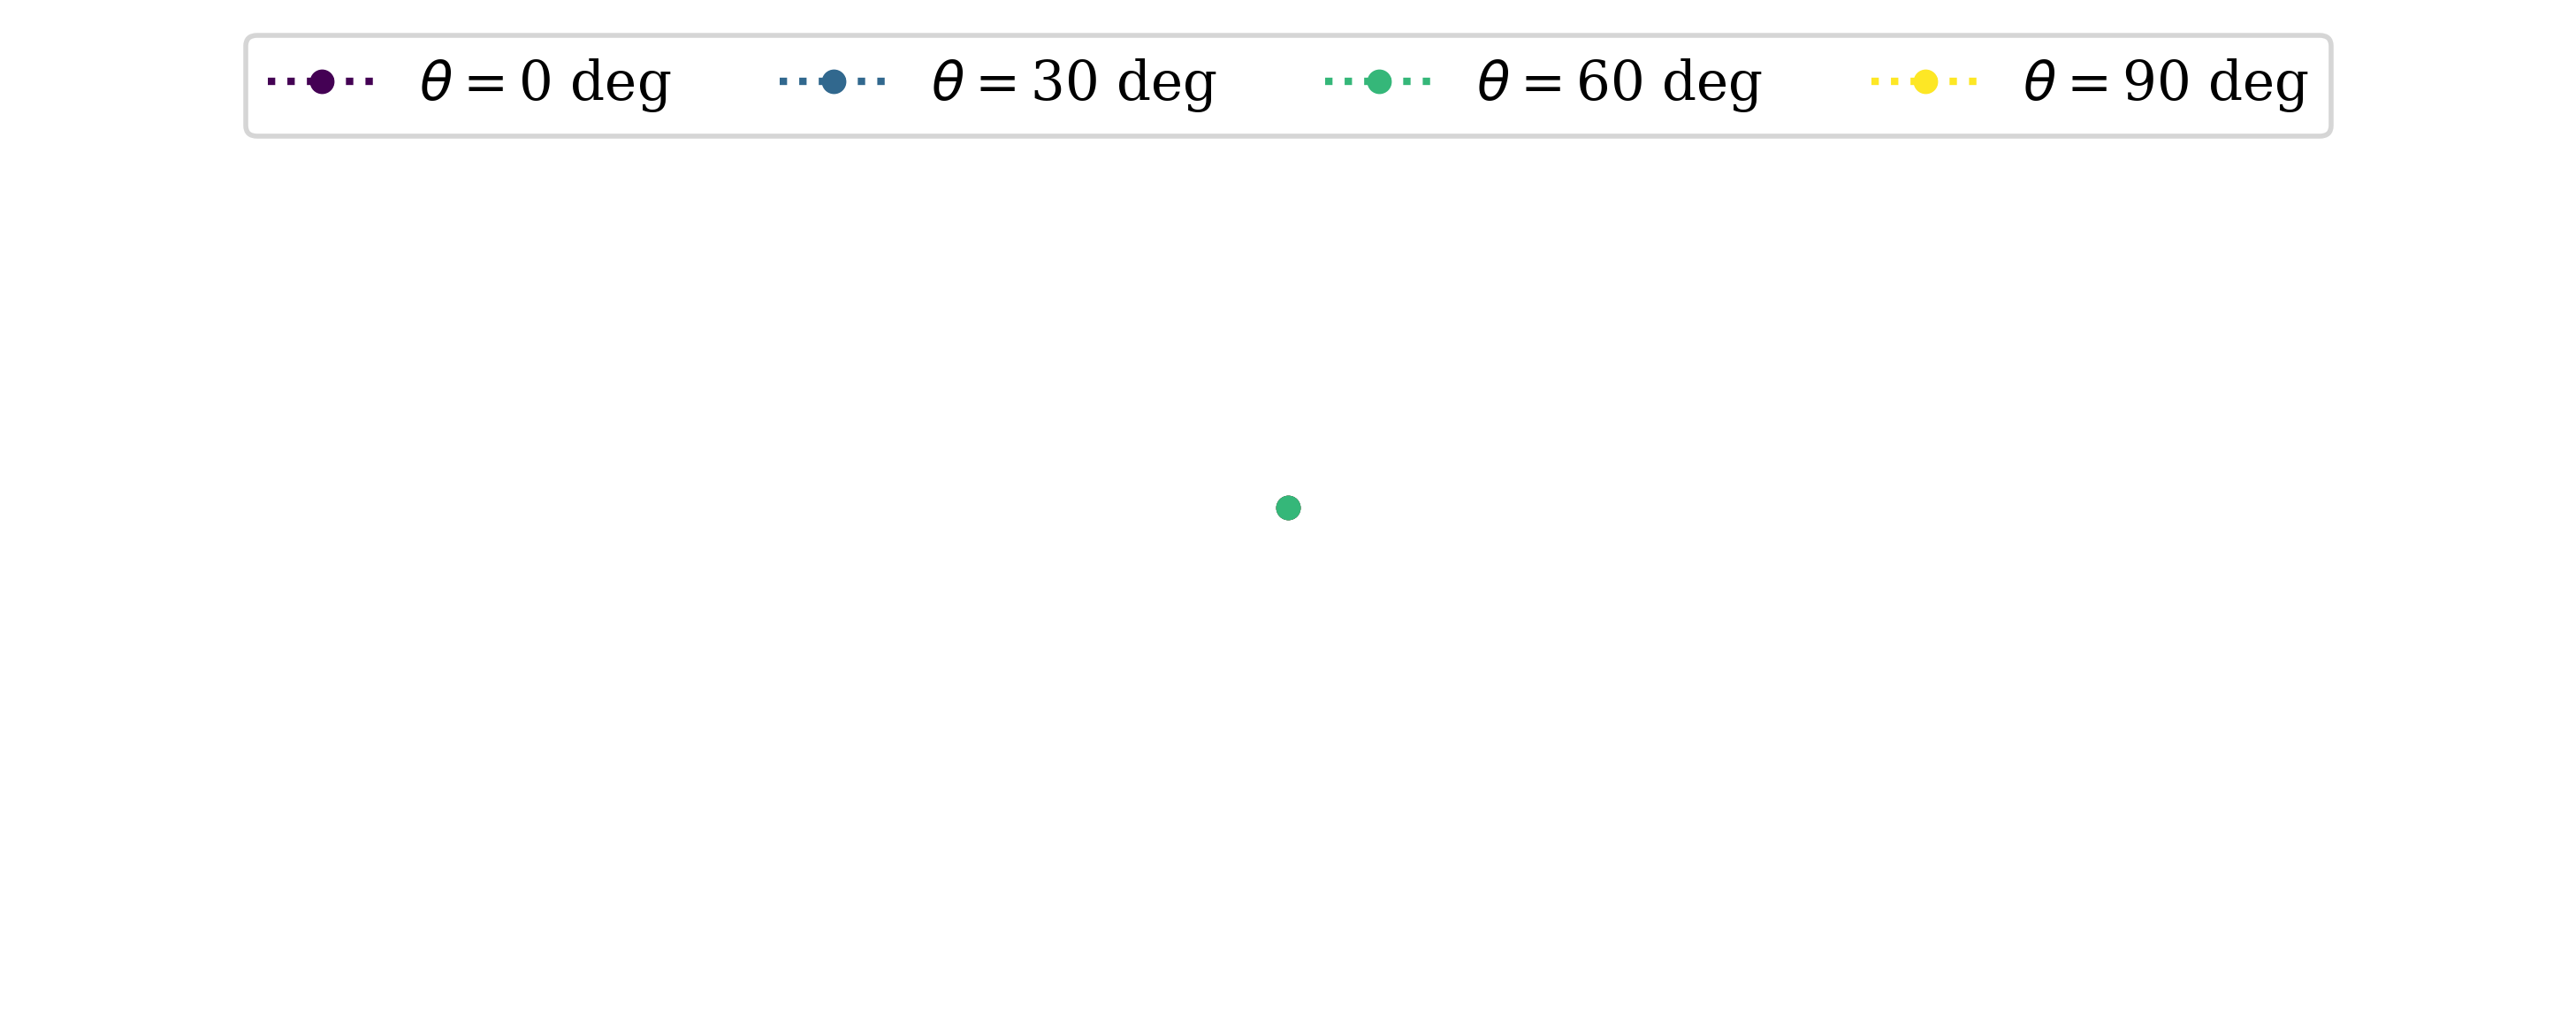

In [23]:
fig, ax = plt.subplots(1, 1, figsize=figsize_3x1)

ax.axis('off')

for scan in scans_b:
    
    label = r'$\theta = $' + scan.tag.split(', ')[0]

    ax.plot([0], [0], marker='o', ms=4, alpha=1, linestyle=':', color=scan.color, label=label)
    
ax.legend()

_handles, _labels = ax.get_legend_handles_labels()
_handles, _labels = np.array(_handles), np.array(_labels)
mask_order = np.array([0, 2, 3, 1])
ax.legend(_handles[mask_order], _labels[mask_order], loc='upper center', borderaxespad=0., ncol=4)

plt.tight_layout()
path_figure = path_figures + 'PA_vs_1oversqrtofb_legend'
plt.savefig(path_figure, dpi=400)

In [24]:
stats.chisquare(f_obs=PAs_fit, f_exp=func_line(1/np.sqrt(bvals_fit), a, b), ddof=1)

Power_divergenceResult(statistic=2.6022729062917275e-07, pvalue=0.9995929793320311)

In [25]:
chi2 = np.sum((PAs_fit - func_line(1/np.sqrt(bvals_fit), a, b))**2 / PAs_std_fit**2)
chi2

0.00039192950083865674

In [26]:
1 - stats.chi2.cdf(chi2, 1)

0.9842051440081546

### DTI: ADC

In [27]:
#### MODELS

def model_a(x, a, b):
    # horizontal line
    return a + 0.0*x*b

def model_b(x, a, b):
    x = np.deg2rad(x)
    return a + b*np.cos(x)**2

def model_c(x, a, b):
    x = np.deg2rad(x)
    return a + b*np.cos(2*x)**2

def model_d(x, a, b):
    x = np.deg2rad(x)
    return a + b*np.cos(x - np.pi/2)**2

models = [model_a, model_b, model_c, model_d]

MD: p1/p0 = 0.15
AD: p1/p0 = 0.13

RMSE
	MD		AD		RD
model_a 5.35e-07	1.86e-06	0.00e+00
model_b 0.00e+00	0.00e+00	2.11e-07
model_c 5.12e-07	1.50e-06	2.37e-07
model_d 1.19e-06	1.93e-06	4.81e-07

AIC
	MD	AD	RD
model_a 203.91	180.97	0.00
model_b 0.00	0.00	95.32
model_c 197.29	148.66	106.35
model_d 437.00	189.91	209.55


MD: p1/p0 = 0.12
AD: p1/p0 = 0.09

RMSE
	MD		AD		RD
model_a 3.24e-08	6.21e-07	0.00e+00
model_b 0.00e+00	0.00e+00	4.48e-07
model_c 7.93e-07	8.78e-07	5.97e-07
model_d 7.23e-07	8.26e-07	5.26e-07

AIC
	MD	AD	RD
model_a 6.58	48.55	0.00
model_b 0.00	0.00	124.27
model_c 199.50	71.10	163.31
model_d 182.68	66.92	144.90


AD: p1/p0 = 0.10

RMSE
	MD		AD		RD
model_a 3.86e-09	9.77e-07	0.00e+00
model_b 0.00e+00	0.00e+00	6.70e-07
model_c 9.23e-07	1.27e-06	8.98e-07
model_d 8.21e-07	1.22e-06	5.78e-07

AIC
	MD	AD	RD
model_a 0.00	67.10	0.00
model_b 1.16	0.00	161.96
model_c 188.83	88.88	212.17
model_d 169.52	85.68	141.13


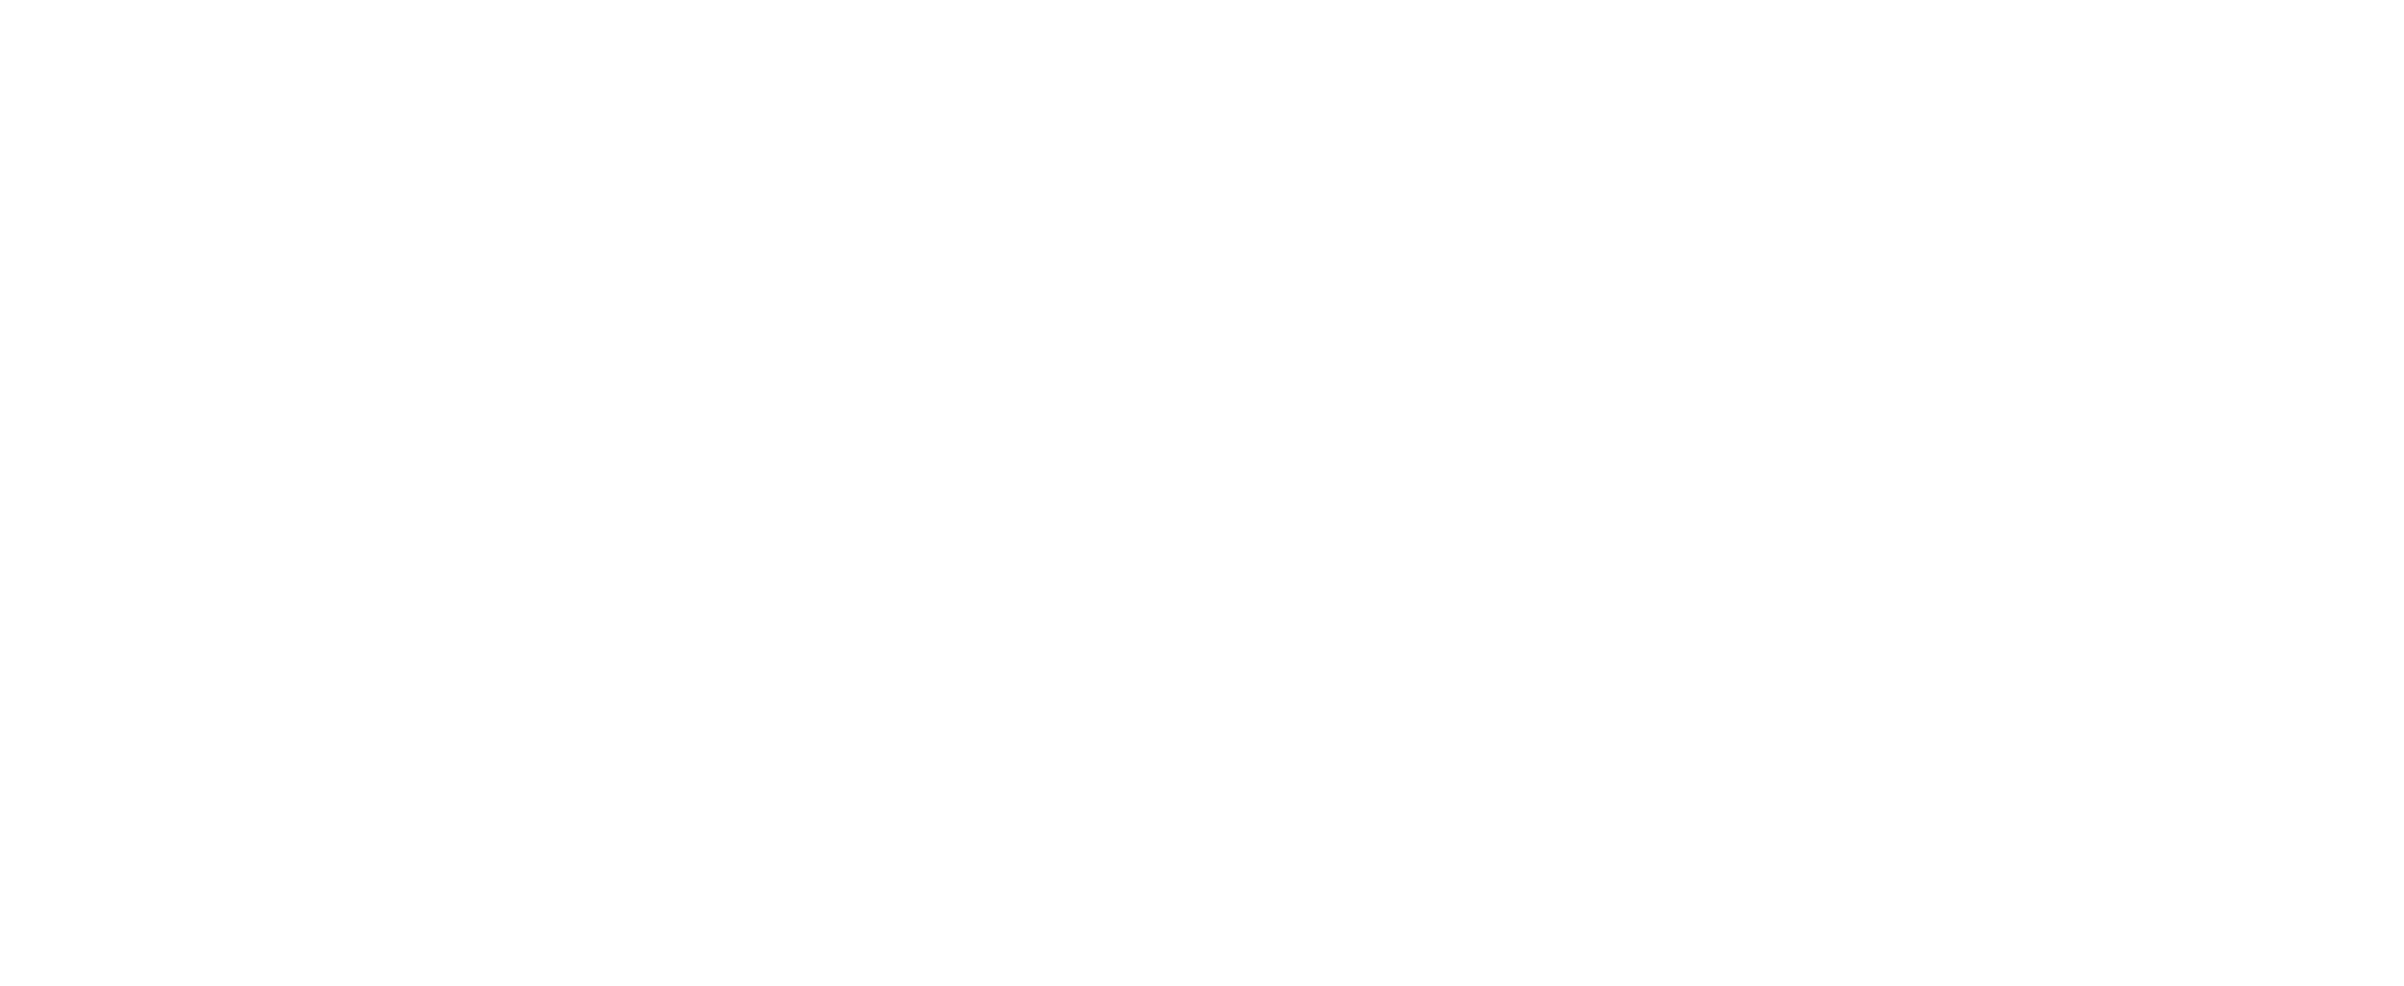

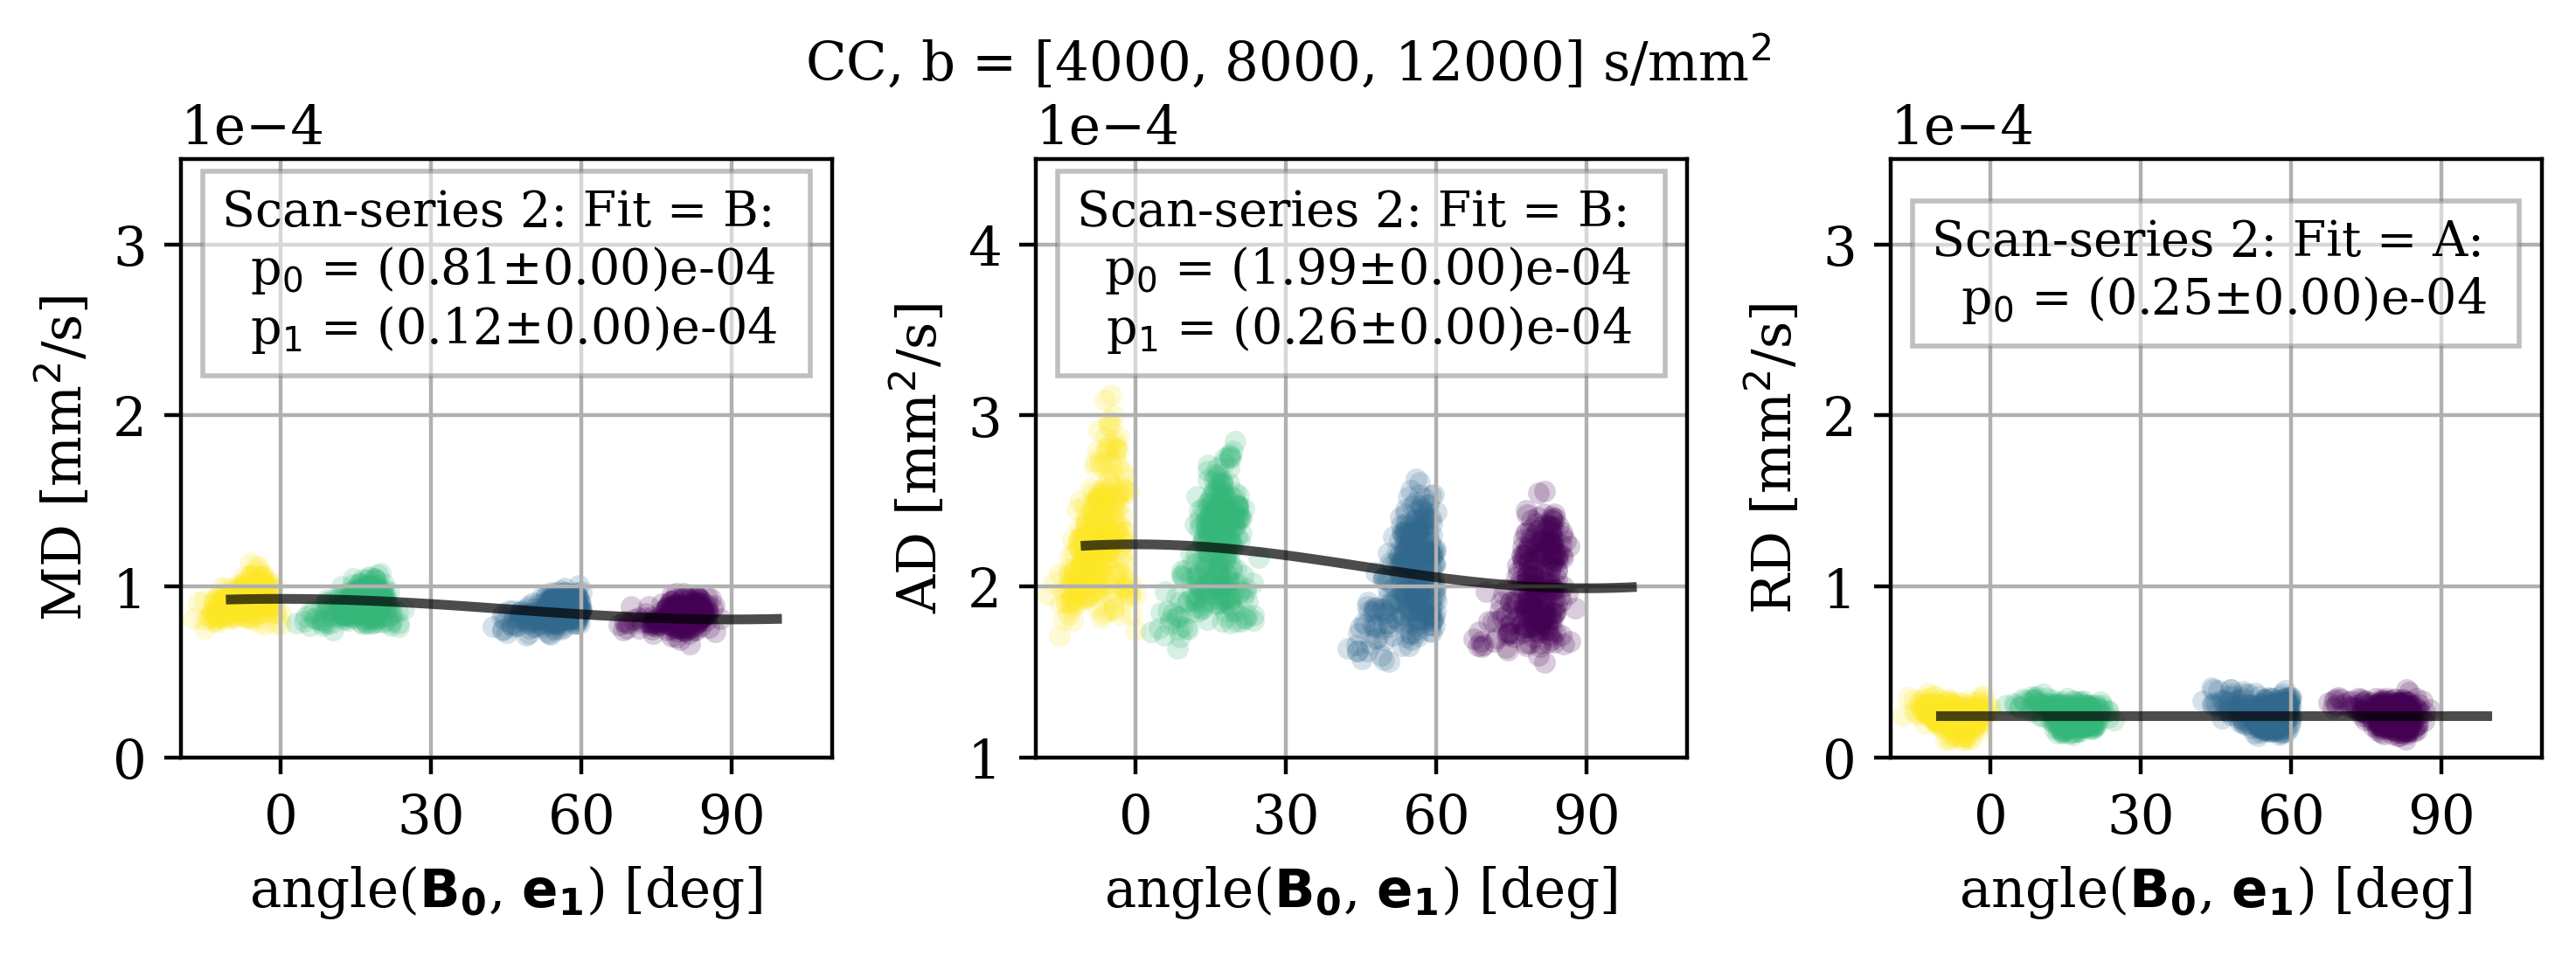

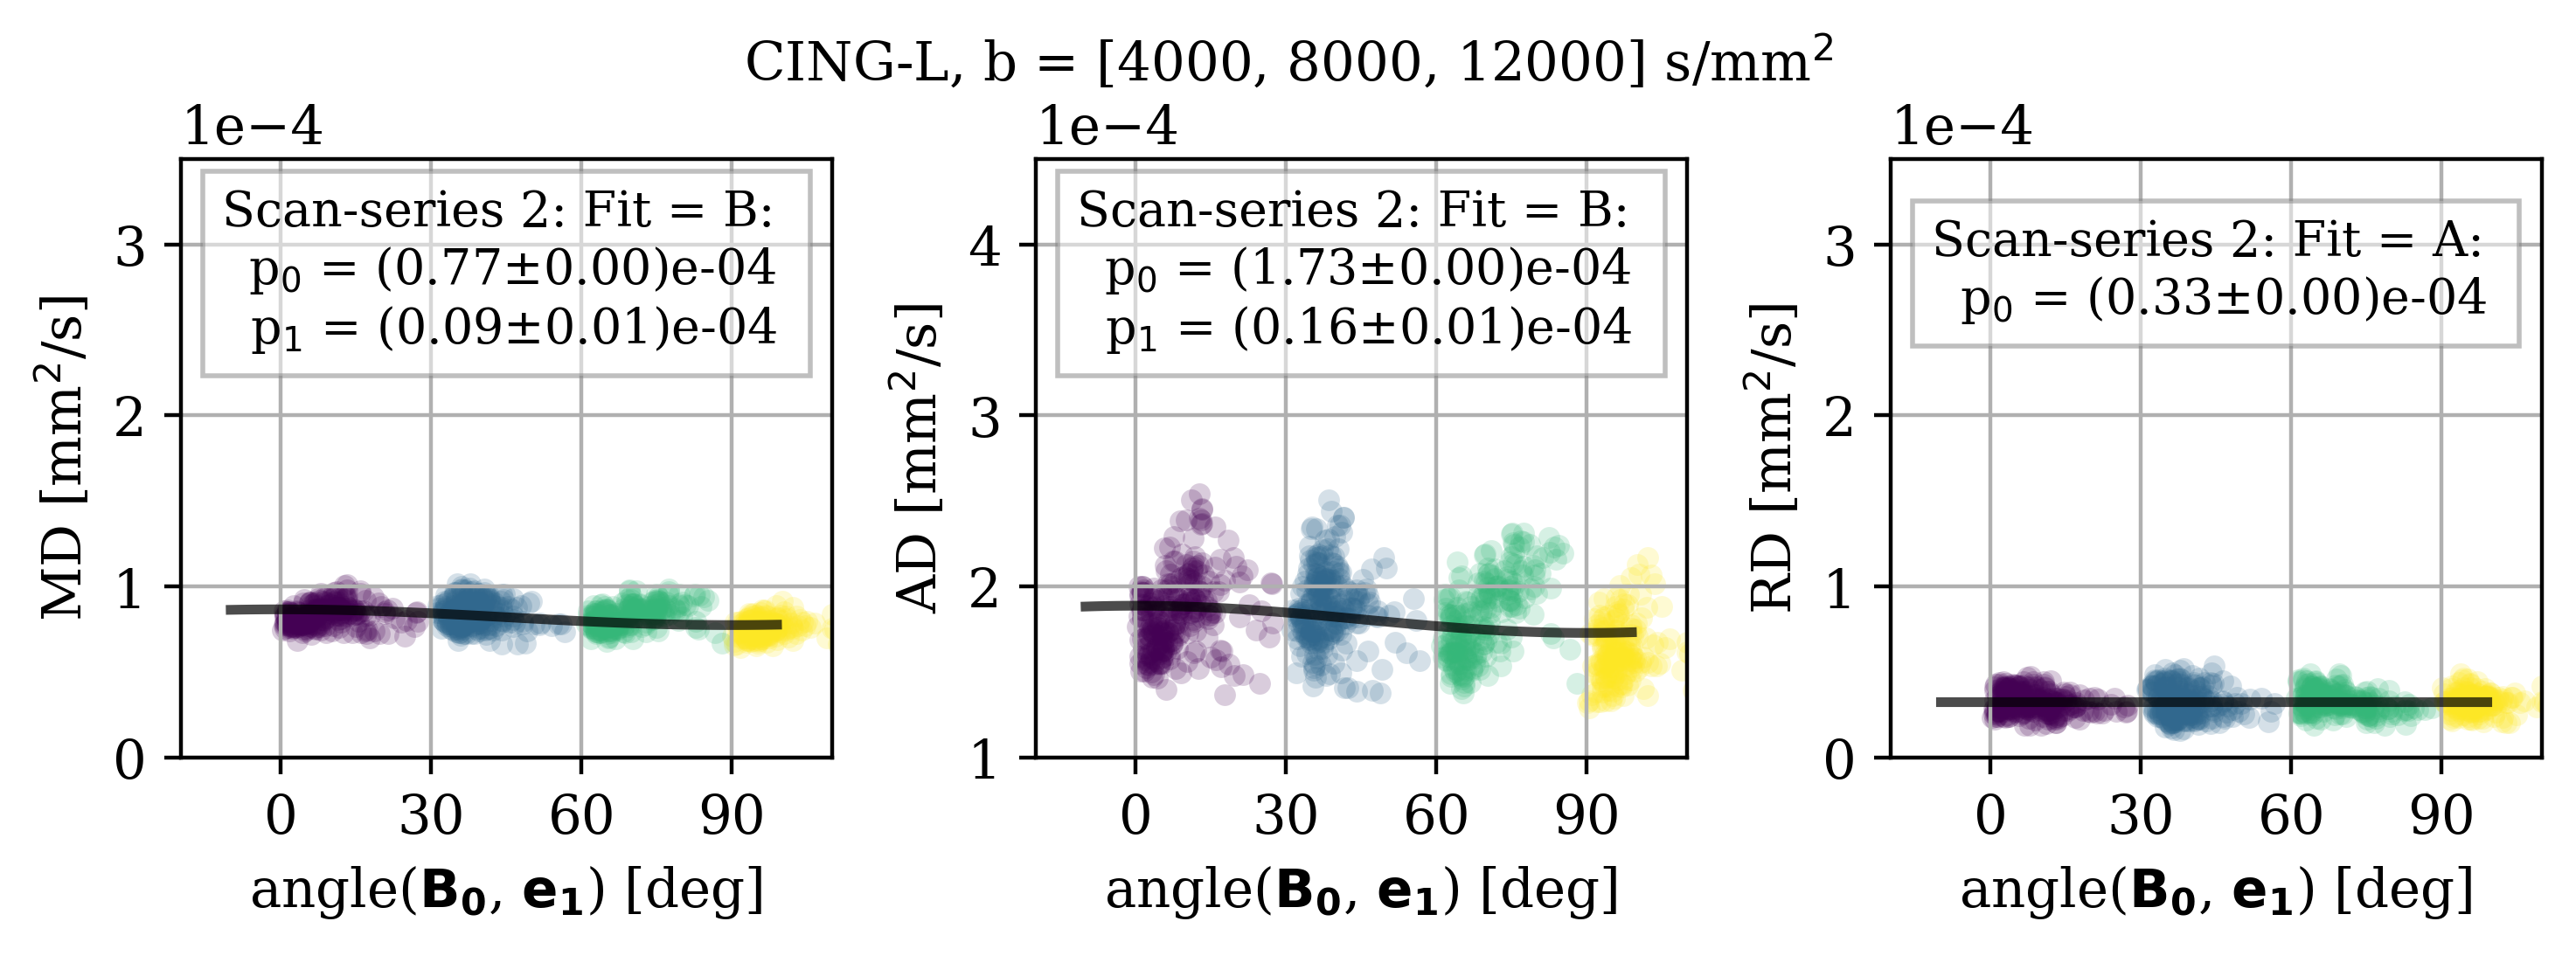

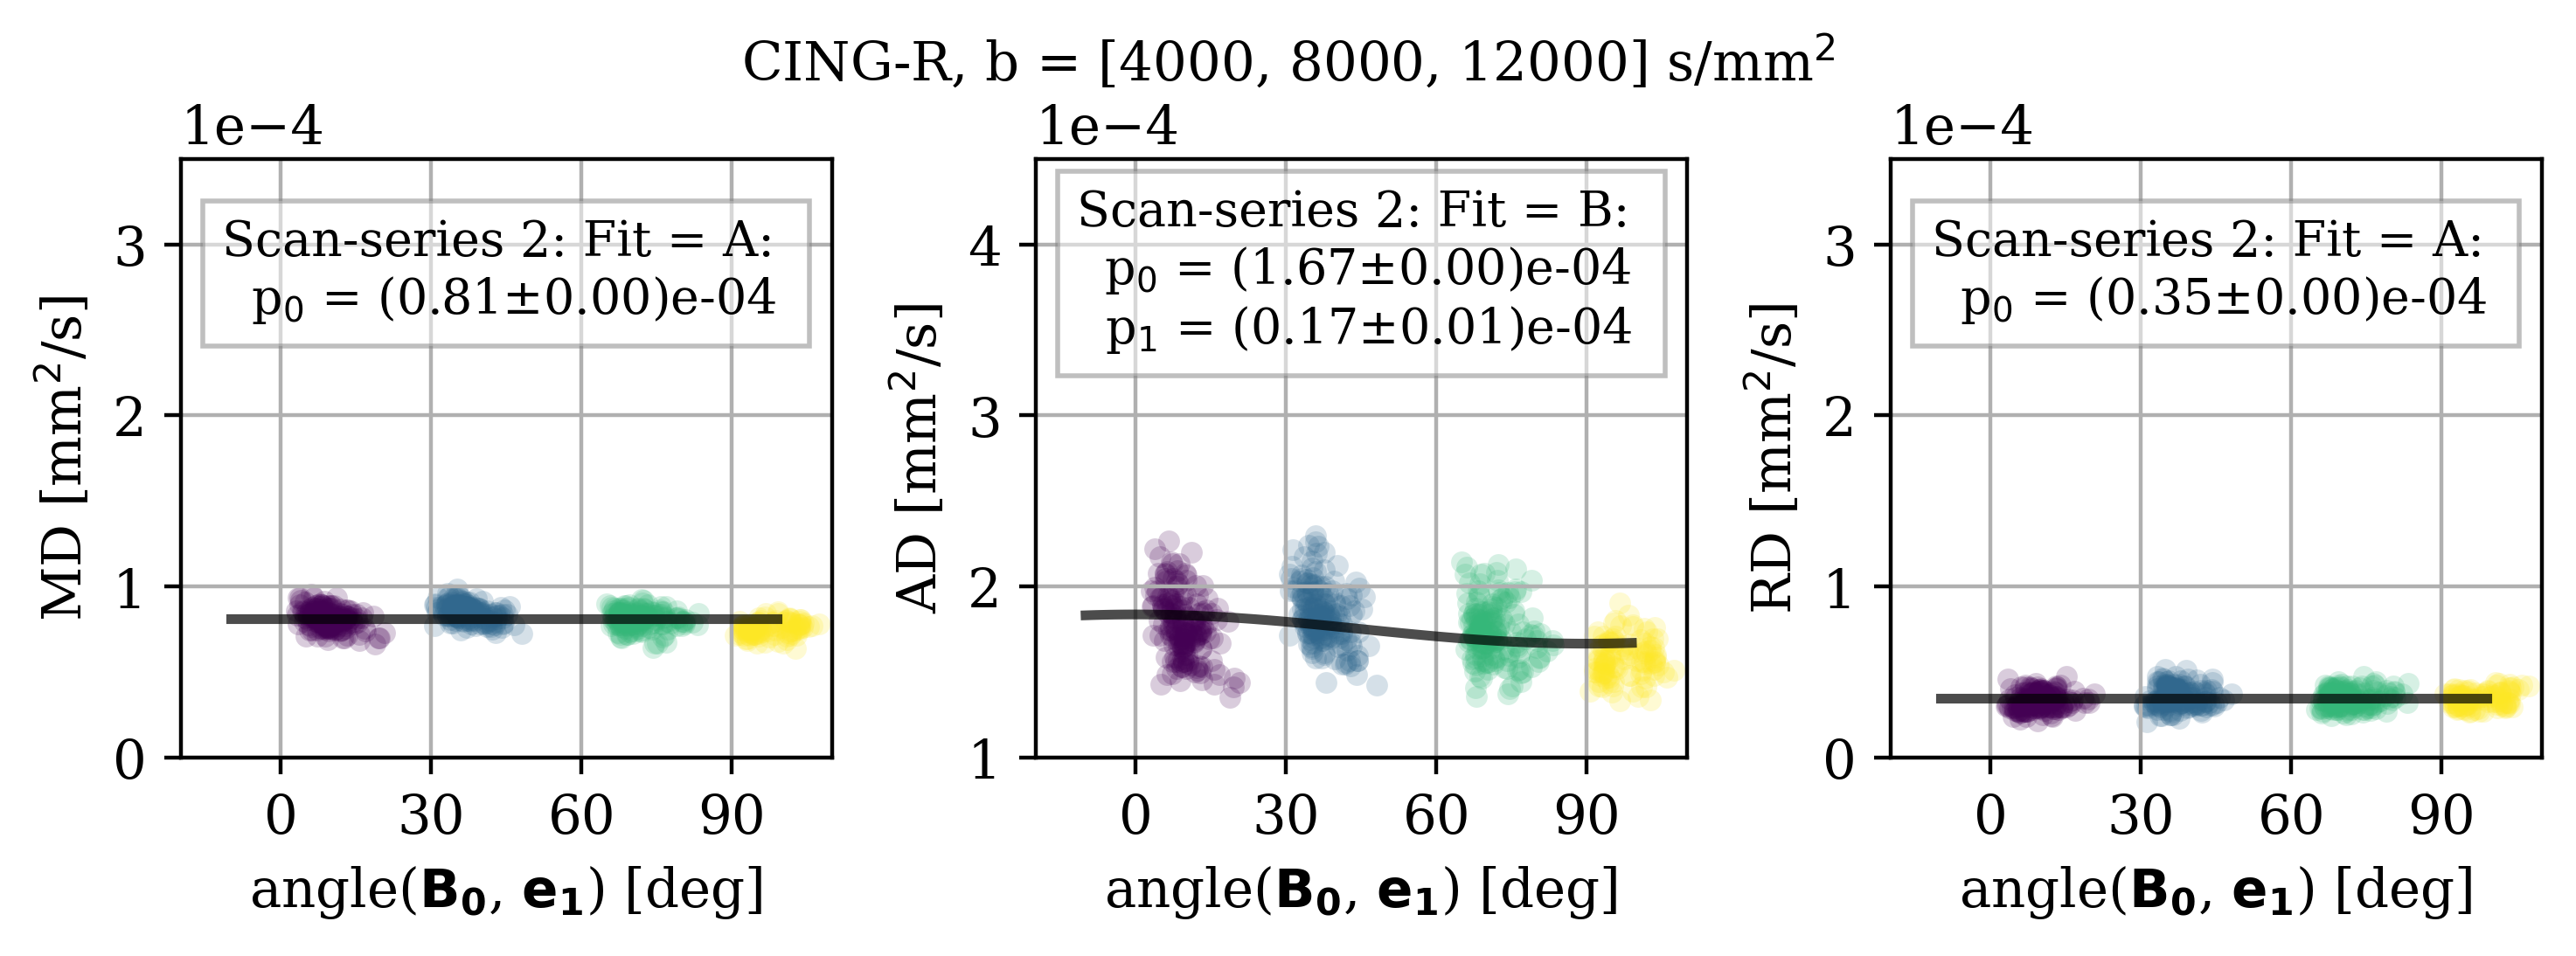

In [30]:
%matplotlib inline

plt.close('all')

size_font = 11

tag_figure = ''

plt.rc('font', family='serif')
plt.rc('font', size=size_font)        # controls default text sizes
plt.rc('axes', titlesize=size_font)   # fontsize of the axes title
plt.rc('axes', labelsize=size_font)   # fontsize of the x and y labels
plt.rc('xtick', labelsize=size_font)  # fontsize of the tick labels
plt.rc('ytick', labelsize=size_font)  # fontsize of the tick labels
plt.rc('legend', fontsize=size_font)  # legend fontsize
plt.rc('figure', titlesize=size_font) # fontsize of the figure title

plt.rcParams['figure.dpi'] = 400

# for confidence interval, have a look here: https://stackoverflow.com/a/65496207/7335087

ms = 16
alpha_scatter = 0.2#0.7 # 0.4
lw = 2
mew = 1
s = 20 #60 #20

report = ''

fig_legend, axs_legend = plt.subplots(1, 3, figsize=figsize_3x1)
for ax in axs_legend:
    ax.axis('off')

markers = ['X']

scaler_a = 1e4
scaler_b = 1e4

for label, idx_label in labels_ROIs.items():
    
    fig, axs = plt.subplots(1, 3, figsize=figsize_3x1)
    fig.suptitle(label+f', b = {bs_oi} s/mm$^2$', y=0.9)
    
    AIC_MD_ref = np.inf
    AIC_AD_ref = np.inf
    AIC_RD_ref = np.inf
    
    display(HTML(f'<b><u>\n\tLabel: {label}</u></b>'))
    display(HTML(f'<b>\nscan-series: {2}</b>'))
    
#     report += label + '\n'
    
    RMSEs = {}
    RMSEs['MD'] = {}
    RMSEs['AD'] = {}
    RMSEs['RD'] = {}
    
    AICs = {}
    AICs['MD'] = {}
    AICs['AD'] = {}
    AICs['RD'] = {}
    
    for marker in markers:
    
        for key, value in RMSEs.items():
            RMSEs[key][marker] = {}

        for key, value in AICs.items():
            AICs[key][marker] = {}
    
    for idx_model, model in enumerate(models):
        
        tag_model = model.__name__.split('_')[-1].upper()
        
        if model.__name__ == 'model_a':
            K = 1
        else:
            K = 2
        
        report += model.__name__ + '\n'
        
        for scans, idx_scan_series, marker, ls, linewidth in zip(scan_sessions, idxs_scan_series, markers, ['-',], [0.0,]):
            
    
            ADCs = np.array([])
            ADCs_angles_oi = np.array([])

            ADC_paras = np.array([])
            ADC_paras_angles_oi = np.array([])

            ADC_perps = np.array([])
            ADC_perps_angles_oi = np.array([])

            for scan in scans:
                
                deg = float(scan.tag.split(' ')[0])

                if label == 'CING-L':
                    mask_oi = scan.mask_CINGL
                    _evecs_oi = scan.evecs[:, :, 0, :, :, 0][mask_oi]
                    _angles_oi = get_angles_between_vectors(_evecs_oi, vec=[0., 1., 0.])
                    _angles_oi = _angles_oi + deg

                    if bs_oi == [50, 1000, 3000, 4000]:
                        axs[0].set_ylim(0.5e-4, 4.0e-4)
                        axs[1].set_ylim(3.0e-4, 6.5e-4)
                        axs[2].set_ylim(0.0e-4, 3.5e-4)
                    elif bs_oi == [8000, 12000, 20000]:
                        axs[0].set_ylim(0.0e-4, 3.5e-4)
                        axs[1].set_ylim(0.0e-4, 3.5e-4)
                        axs[2].set_ylim(0.0e-4, 3.5e-4)
                    else:
                        axs[0].set_ylim(0.0e-4, 3.5e-4)
                        axs[1].set_ylim(1.0e-4, 4.5e-4)
                        axs[2].set_ylim(0.0e-4, 3.5e-4)
                        
                elif label == 'CING-R':
                    mask_oi = scan.mask_CINGR
                    _evecs_oi = scan.evecs[:, :, 0, :, :, 0][mask_oi]
                    _angles_oi = get_angles_between_vectors(_evecs_oi, vec=[0., 1., 0.])
                    _angles_oi = _angles_oi + deg

                    if bs_oi == [50, 1000, 3000, 4000]:
                        axs[0].set_ylim(0.5e-4, 4.0e-4)
                        axs[1].set_ylim(3.0e-4, 6.5e-4)
                        axs[2].set_ylim(0.0e-4, 3.5e-4)
                    elif bs_oi == [8000, 12000, 20000]:
                        axs[0].set_ylim(0.0e-4, 3.5e-4)
                        axs[1].set_ylim(0.0e-4, 3.5e-4)
                        axs[2].set_ylim(0.0e-4, 3.5e-4)
                    else:
                        axs[0].set_ylim(0.0e-4, 3.5e-4)
                        axs[1].set_ylim(1.0e-4, 4.5e-4)
                        axs[2].set_ylim(0.0e-4, 3.5e-4)
                        
                elif label == 'CC':
                    mask_oi = scan.mask_CC
                    _evecs_oi = scan.evecs[:, :, 0, :, :, 0][mask_oi]
                    _angles_oi = get_angles_between_vectors(_evecs_oi, vec=[0., 1., 0.])
                    _angles_oi = _angles_oi - deg

                    if bs_oi == [50, 1000, 3000, 4000]:
                        axs[0].set_ylim(0.5e-4, 4.0e-4)
                        if marker == 's': axs[1].set_ylim(3.7e-4, 7.2e-4)
                        if marker == 'X': axs[1].set_ylim(3.3e-4, 6.8e-4)
                        axs[2].set_ylim(0.0e-4, 3.5e-4)
                    elif bs_oi == [8000, 12000, 20000]:
                        axs[0].set_ylim(0.0e-4, 3.5e-4)
                        axs[1].set_ylim(0.0e-4, 3.5e-4)
                        axs[2].set_ylim(0.0e-4, 3.5e-4)
                    else:
                        axs[0].set_ylim(0.0e-4, 3.5e-4)
                        axs[1].set_ylim(1.0e-4, 4.5e-4)
                        axs[2].set_ylim(0.0e-4, 3.5e-4)
            
                

                #### ADC 
                
                ADC = scan.MD[mask_oi]

                ADCs = np.append(ADCs, ADC)
                ADCs_angles_oi = np.append(ADCs_angles_oi, _angles_oi)

                if idx_model == 0:
                    axs[0].scatter(_angles_oi, ADC, alpha=alpha_scatter, color=scan.color, 
                                   marker='o', linewidth=linewidth, s=s, 
                                   label=r'$\theta = $'+f'{scan.tag}'
                                  )

                    # MEAN
                    axs[0].set_xlabel(r'angle($\mathbf{B_0}$, $\mathbf{e_1}$) [deg]')
                    axs[0].set_ylabel('MD [mm$^2$/s]')
                    axs[0].grid(True)
                    axs[0].set_xticks([0, 30, 60, 90])
                    axs[0].set_xlim(-20, 110)
                    axs[0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

                #### ADC parallel
                ADC_para = scan.eval1[mask_oi]

                ADC_paras = np.append(ADC_paras, ADC_para)
                ADC_paras_angles_oi = np.append(ADC_paras_angles_oi, _angles_oi)

                if idx_model == 0:
                    axs[1].scatter(_angles_oi, ADC_para, alpha=alpha_scatter, color=scan.color, 
                                   marker='o', linewidth=linewidth, s=s, 
                                   label=r'$\theta = $'+f'{scan.tag}'
                                  )

                    # MEAN
                    axs[1].set_xlabel(r'angle($\mathbf{B_0}$, $\mathbf{e_1}$) [deg]')
                    axs[1].set_ylabel('AD [mm$^2$/s]')
                    #axs[1].set_yticklabels([])
                    axs[1].grid(True)
                    axs[1].set_xticks([0, 30, 60, 90])
                    axs[1].set_xlim(-20, 110)
                    axs[1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

                #### ADC perpendicular
                ADC_perp = np.mean([scan.eval2[mask_oi], scan.eval3[mask_oi]], axis=0)

                ADC_perps = np.append(ADC_perps, ADC_perp)
                ADC_perps_angles_oi = np.append(ADC_perps_angles_oi, _angles_oi)

                if idx_model == 0:
                    axs[2].scatter(_angles_oi, ADC_perp, alpha=alpha_scatter, color=scan.color, 
                                   marker='o', linewidth=linewidth, s=s,
                                   label=r'$\theta = $'+f'{scan.tag}'.replace(', PGSE', '')
                                  )

                    # MEAN
                    axs[2].set_xlabel(r'angle($\mathbf{B_0}$, $\mathbf{e_1}$) [deg]')
                    axs[2].set_ylabel(r'RD [mm$^2$/s]')
                    #axs[2].set_yticklabels([])
                    axs[2].grid(True)
                    axs[2].set_xticks([0, 30, 60, 90])
                    axs[2].set_xlim(-20, 110)
                    axs[2].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

                plt.tight_layout()

            #### FIT
            maxfev = 5000
            p0 = None
            bounds = None
            #p0 = (2e-5, 3e-4)
            bounds = ([-np.inf, 0], [np.inf, np.inf])

            #### ADC
            popt, pcov = curve_fit(model, ADCs_angles_oi, ADCs, maxfev=maxfev, bounds=bounds)#, p0=p0, bounds=bounds)
            a, b = popt
            a_std, b_std = np.sqrt(np.diag(pcov))
            rmse = sklearn.metrics.mean_squared_error(ADCs, model(ADCs_angles_oi, a, b), squared=False)
            RMSEs['MD'][marker][model.__name__] = rmse
            RSS = np.sum((ADCs - model(ADCs_angles_oi, a, b))**2)
            AIC = 2 * K + len(ADCs) * np.log(RSS / len(ADCs))
            AICs['MD'][marker][model.__name__] = AIC
            
#             if label == 'CING-R':
#                 if '_b' in model.__name__:
#                     fit_MD = {}
#                     fit_MD['model'] = model
#                     fit_MD['a'] = a
#                     fit_MD['b'] = b
#                     AIC_MD_ref = AIC
#                     tag_figure = 'forced_B_for_CING-R'
#                     display(HTML(f"<font color='red'>{tag_figure}</font>"))
#             elif AIC < AIC_MD_ref:
            if AIC < AIC_MD_ref:
                fit_MD = {}
                fit_MD['model'] = model
                fit_MD['a'] = a
                fit_MD['b'] = b
                AIC_MD_ref = AIC
                
            #### ADC_para
            popt, pcov = curve_fit(model, ADC_paras_angles_oi, ADC_paras, maxfev=maxfev, bounds=bounds)#, p0=p0, bounds=bounds)
            a, b = popt
            a_std, b_std = np.sqrt(np.diag(pcov))
            rmse = sklearn.metrics.mean_squared_error(ADC_paras, model(ADC_paras_angles_oi, a, b), squared=False)
            RMSEs['AD'][marker][model.__name__] = rmse
            RSS = np.sum((ADC_paras - model(ADC_paras_angles_oi, a, b))**2)
            AIC = 2 * K + len(ADC_paras) * np.log(RSS / len(ADC_paras))
            AICs['AD'][marker][model.__name__] = AIC
            
            if AIC < AIC_AD_ref:
                fit_AD = {}
                fit_AD['model'] = model
                fit_AD['a'] = a
                fit_AD['b'] = b
                AIC_AD_ref = AIC

            #### ADC_perp
            popt, pcov = curve_fit(model, ADC_perps_angles_oi, ADC_perps, maxfev=maxfev, bounds=bounds)#, p0=p0, bounds=bounds)
            a, b = popt
            a_std, b_std = np.sqrt(np.diag(pcov))
            rmse = sklearn.metrics.mean_squared_error(ADC_perps, model(ADC_perps_angles_oi, a, b), squared=False)
            RMSEs['RD'][marker][model.__name__] = rmse
            RSS = np.sum((ADC_perps - model(ADC_perps_angles_oi, a, b))**2)
            AIC = 2 * K + len(ADC_perps) * np.log(RSS / len(ADC_perps))
            AICs['RD'][marker][model.__name__] = AIC
            
            if AIC < AIC_RD_ref:
                fit_RD = {}
                fit_RD['model'] = model
                fit_RD['a'] = a
                fit_RD['b'] = b
                AIC_RD_ref = AIC    

    #### PLOT BEST FIT
    x_fit = np.arange(-10, 100, 1)

    ## MD
    model = fit_MD['model']
    tag_model = model.__name__.split('_')[-1].upper()
    a = fit_MD['a']
    b = fit_MD['b']
    if tag_model != 'A': print('MD: p1/p0 = %.2f' %(round(b/a, 2)))
    text_fit = f'Scan-series {idx_scan_series}: Fit = {tag_model}:'+' \n p$_0$ = (%.2f$\pm$%.2f)e-04 \n p$_1$ = (%.2f$\pm$%.2f)e-04' %(a*scaler_a, a_std*scaler_a, b*scaler_b, b_std*scaler_b)
    if model.__name__ == 'model_a': text_fit = text_fit.split(' \n p$_1$')[0]

    axs[0].plot(x_fit, model(x_fit, a, b), color='black', alpha=0.7, lw=lw, ls=ls)

    t = axs[0].text(0.5, 0.81, text_fit, ha='center', va='center', transform=axs[0].transAxes, fontsize=10)
    t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='gray'))
    
    ## AD
    model = fit_AD['model']
    tag_model = model.__name__.split('_')[-1].upper()
    a = fit_AD['a']
    b = fit_AD['b']
    if tag_model != 'A': print('AD: p1/p0 = %.2f' %(round(b/a, 2)))
    text_fit = f'Scan-series {idx_scan_series}: Fit = {tag_model}:'+' \n p$_0$ = (%.2f$\pm$%.2f)e-04 \n p$_1$ = (%.2f$\pm$%.2f)e-04' %(a*scaler_a, a_std*scaler_a, b*scaler_b, b_std*scaler_b)
    if model.__name__ == 'model_a': text_fit = text_fit.split(' \n p$_1$')[0]
    
    axs[1].plot(x_fit, model(x_fit, a, b), color='black', alpha=0.7, lw=lw, ls=ls)
    
    t = axs[1].text(0.5, 0.81, text_fit, ha='center', va='center', transform=axs[1].transAxes, fontsize=10)
    t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='gray'))
    
    ## RD
    model = fit_RD['model']
    tag_model = model.__name__.split('_')[-1].upper()
    a = fit_RD['a']
    b = fit_RD['b']
    if tag_model != 'A': print('RD: p1/p0 = %.2f' %(round(b/a, 2)))
    text_fit = f'Scan-series {idx_scan_series}: Fit = {tag_model}:'+' \n p$_0$ = (%.2f$\pm$%.2f)e-04 \n p$_1$ = (%.2f$\pm$%.2f)e-04' %(a*scaler_a, a_std*scaler_a, b*scaler_b, b_std*scaler_b)
    if model.__name__ == 'model_a': text_fit = text_fit.split(' \n p$_1$')[0]
    
    axs[2].plot(x_fit, model(x_fit, a, b), color='black', alpha=0.7, lw=lw, ls=ls)
    
    t = axs[2].text(0.5, 0.81, text_fit, ha='center', va='center', transform=axs[2].transAxes, fontsize=10)
    t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='gray'))
    
    #### SETUP
    for ax in axs:
        ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    ## legend
    axs[2].plot([], [], label='Scan-series 1:', color='white')
    axs[2].plot([], [], label='Scan-series 2:', color='white')

    plt.tight_layout()    
    
    
    #### PRINT REPORTS 
    for idx_scan_series, marker in zip(idxs_scan_series, markers):
        
        
        #### PRINT RMSE TABLE
        print('\nRMSE')
        As = []

        for name_metric, _models in RMSEs.items():

            a = np.array(list(_models[marker].values()))
            a -= np.min(a)

            As.append(a)

        As = np.array(As).T

        print('\tMD\t\tAD\t\tRD')
        for a, model in zip(As, models):
            print(model.__name__, '%.2e\t%.2e\t%.2e' %(a[0], a[1], a[2]))

        #### PRINT AIC TABLE
        print('\nAIC')
        As = []

        for name_metric, _models in AICs.items():

            a = np.array(list(_models[marker].values()))
            a -= np.min(a)

            As.append(a)

        As = np.array(As).T

        print('\tMD\tAD\tRD')
        for a, model in zip(As, models):
            print(model.__name__, '%.2f\t%.2f\t%.2f' %(a[0], a[1], a[2]))
            
            
    path_figure = path_figures + f'orientation_dependencies/idx_scan_series={idx_scan_series}-label={label}-bs_oi={bs_oi}{tag_figure}'
    plt.savefig(path_figure, dpi=400)

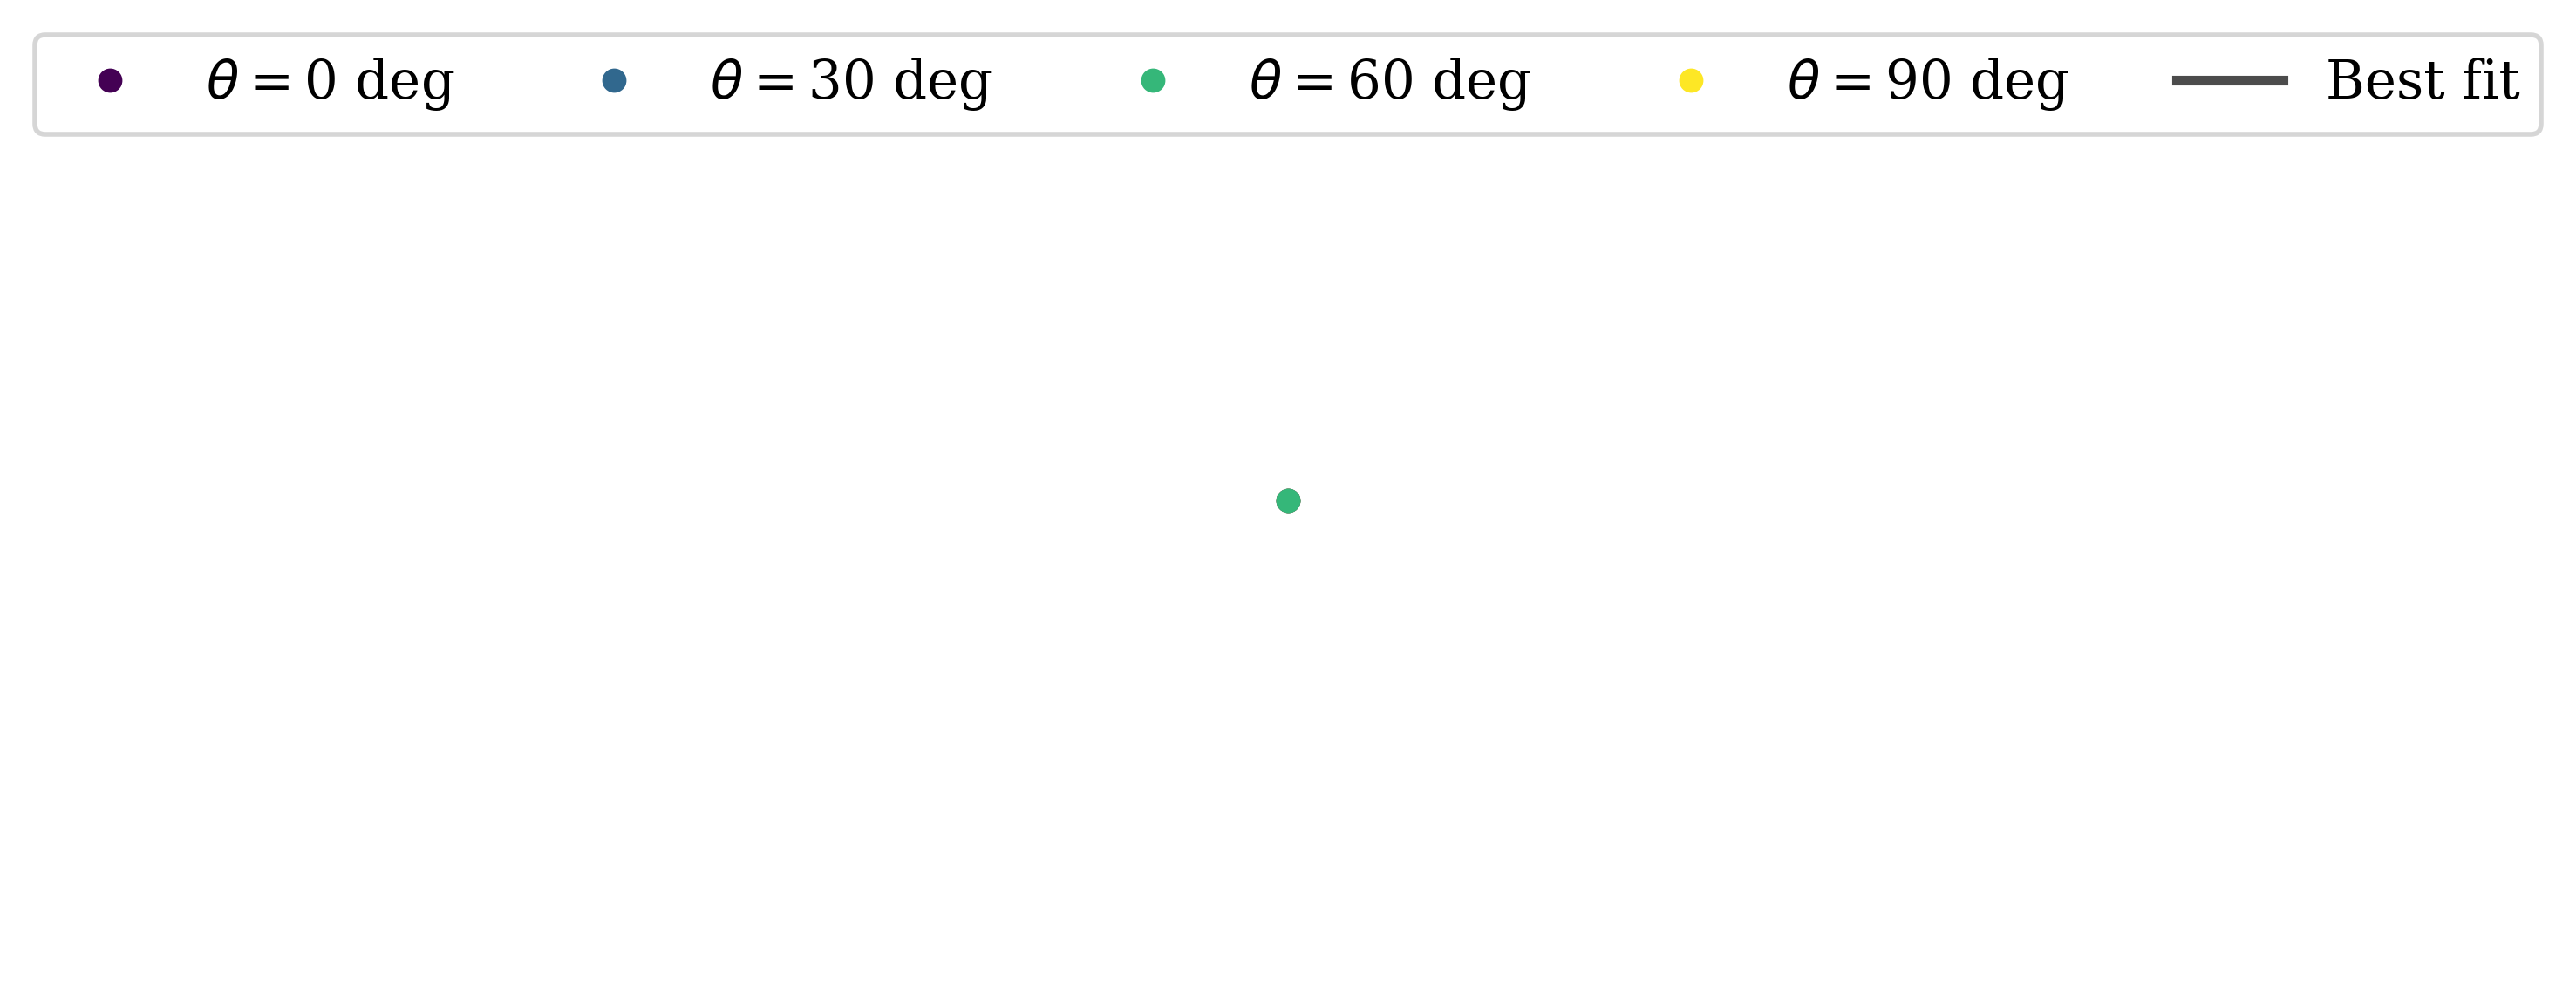

In [43]:
fig, ax = plt.subplots(1, 1, figsize=figsize_3x1)

ax.axis('off')

for scan in scans_b:
    
    label = r'$\theta = $' + scan.tag.split(', ')[0]

    ax.plot([0], [0], marker='o', ms=4, alpha=1, linestyle='None', color=scan.color, label=label)
    
ax.plot([0, 0], [0, 0], color='black', alpha=0.7, lw=lw, ls=ls, label='Best fit')
    
ax.legend()

_handles, _labels = ax.get_legend_handles_labels()
_handles, _labels = np.array(_handles), np.array(_labels)
mask_order = np.array([0, 2, 3, 1, 4])
ax.legend(_handles[mask_order], _labels[mask_order], loc='upper center', borderaxespad=0., ncol=5)

plt.tight_layout()
path_figure = path_figures + 'orientation_dependencies/legend'
plt.savefig(path_figure, dpi=400)